**Introduction**
<br>
<img src="https://images.ctfassets.net/hrltx12pl8hq/1Rbzpu1Sbood01BuTfK1Dz/8b652ada8a031cbcd9c51faff826dce5/Coronavirus_infographic.jpg?fit=fill&w=480&h=270">
<br>
COVID-19  is a disease caused by SARS-CoV-2 that can trigger what doctors call a respiratory tract infection, which made world stand still for months. 

Analysis COVID-19 Infections, Deaths and Vaccinations will give us more insight to the spread of virus in Canada and World, and how vaccination is helping us to slow down the spread of the virus.


In [ ]:
%pip install --upgrade plotly

###Importing packages

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

###Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

<h1>Analysis of Covid 19 - Cases and Deaths</h1>

###Read the data

In [ ]:
covid_death_data = pd.read_excel('covid_deaths.xlsx')

# Data Exploration & Cleaning

Preliminary data exploration. 

In [ ]:
covid_death_data.shape

(124675, 26)

The dataset consists of 26 columns and 124675!!!

Let's see what are the columns:

In [ ]:
covid_death_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
covid_death_data.describe()

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,"123,799.00","117,942.00","117,938.00","116,924.00","107,048.00","107,201.00","116,924.00","117,322.00","117,318.00","116,309.00","106,441.00","106,594.00","116,309.00","100,541.00","15,225.00","15,225.00","17,363.00","17,363.00","1,277.00","1,277.00","2,103.00","2,103.00"
mean,"121,898,313.89","1,489,929.38","6,451.16","6,475.67","37,455.74",144.11,131.65,"18,494.06",84.37,84.44,383.85,1.58,1.44,1.00,882.26,21.68,"4,057.67",154.52,211.14,16.50,"2,986.19",81.24
std,"674,965,365.42","9,946,405.73","39,209.21","38,824.66","223,017.15",786.03,736.65,"31,167.29",195.67,164.97,642.98,4.13,3.10,0.34,"2,833.80",24.54,"11,447.79",209.05,492.35,31.03,"10,456.40",137.45
min,47.00,1.00,"-74,347.00","-6,223.00",1.00,"-1,918.00",-232.14,0.00,"-3,125.83",-272.97,0.00,-75.91,-10.84,-0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,015,490.00","2,080.00",3.00,9.57,70.00,0.00,0.00,367.43,0.29,1.58,10.76,0.00,0.00,0.83,21.00,3.37,99.00,21.32,5.92,1.47,38.26,9.30
50%,"9,442,867.00","22,024.00",93.00,116.86,622.00,2.00,1.71,"2,884.98",10.86,15.06,71.97,0.15,0.20,1.01,102.00,12.28,489.00,69.03,26.10,5.70,224.12,33.42
75%,"33,933,611.00","223,641.75",933.75,987.00,"5,447.00",19.00,15.86,"22,779.87",82.27,91.98,473.65,1.38,1.37,1.17,506.00,33.08,"2,307.00",200.58,138.85,17.89,"1,205.98",102.68
max,"7,874,965,730.00","241,132,266.00","905,955.00","826,438.43","4,905,094.00","18,006.00","14,703.14","221,888.59","8,620.69","3,385.47","5,991.77",203.51,94.80,5.87,"28,891.00",192.27,"133,253.00","1,544.08","4,002.46",279.22,"116,307.00","1,361.14"


Let's analyze Covid data in Canada

In [ ]:
covid_death_canada = covid_death_data[covid_death_data.location=='Canada']

In [ ]:
covid_death_canada.shape

(632, 26)

In [ ]:
covid_death_canada.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
20163,CAN,North America,Canada,2020-01-26,"38,067,913.00",1.00,1.00,nan,nan,nan,nan,0.03,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20164,CAN,North America,Canada,2020-01-27,"38,067,913.00",1.00,0.00,nan,nan,nan,nan,0.03,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20165,CAN,North America,Canada,2020-01-28,"38,067,913.00",2.00,1.00,nan,nan,nan,nan,0.05,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20166,CAN,North America,Canada,2020-01-29,"38,067,913.00",2.00,0.00,nan,nan,nan,nan,0.05,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20167,CAN,North America,Canada,2020-01-30,"38,067,913.00",2.00,0.00,nan,nan,nan,nan,0.05,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
covid_death_canada.describe()

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,632.00,632.00,632.00,627.00,589.00,589.00,627.00,632.00,632.00,627.00,589.00,589.00,627.00,585.00,589.00,589.00,589.00,589.00,0.00,0.00,0.00,0.00
mean,"38,067,913.00","642,096.42","2,679.37","2,686.02","16,138.61",48.58,45.44,"16,867.13",70.38,70.56,423.94,1.28,1.19,1.08,495.67,13.02,"1,850.21",48.60,nan,nan,nan,nan
std,0.00,"590,132.89","2,629.59","2,456.58","8,845.32",49.32,46.80,"15,502.11",69.08,64.53,232.36,1.30,1.23,0.32,356.90,9.38,"1,290.14",33.89,nan,nan,nan,nan
min,"38,067,913.00",1.00,0.00,0.00,1.00,-1.00,0.00,0.03,0.00,0.00,0.03,-0.03,0.00,0.65,0.00,0.00,4.00,0.10,nan,nan,nan,nan
25%,"38,067,913.00","106,494.00",535.25,514.71,"9,035.00",11.00,8.64,"2,797.47",14.06,13.52,237.34,0.29,0.23,0.89,200.00,5.25,617.00,16.21,nan,nan,nan,nan
50%,"38,067,913.00","424,167.50","1,649.50","1,824.43","15,328.00",32.00,30.29,"11,142.39",43.33,47.93,402.65,0.84,0.80,1.05,465.00,12.21,"1,840.00",48.34,nan,nan,nan,nan
75%,"38,067,913.00","1,322,787.75","4,228.75","4,264.64","25,262.00",67.00,59.57,"34,748.10",111.08,112.03,663.60,1.76,1.56,1.19,728.00,19.12,"2,678.00",70.35,nan,nan,nan,nan
max,"38,067,913.00","1,693,364.00","11,381.00","8,831.57","28,616.00",244.00,193.14,"44,482.71",298.97,232.00,751.71,6.41,5.07,2.66,"1,469.00",38.59,"4,879.00",128.17,nan,nan,nan,nan


From the early exploraion, we can see that the minimum number of covid cases in Canada was 1, which is the first case. The total number of cases at the time I got the data is 1.69M and total deaths as 28616.

### Duplicate and NaN values:  

In [ ]:
covid_death_canada.duplicated().values.any()

False

In [ ]:
covid_death_canada.isna().values.any()

True

In [ ]:
covid_death_canada.isna().sum()

iso_code                                0
continent                               0
location                                0
date                                    0
population                              0
total_cases                             0
new_cases                               0
new_cases_smoothed                      5
total_deaths                           43
new_deaths                             43
new_deaths_smoothed                     5
total_cases_per_million                 0
new_cases_per_million                   0
new_cases_smoothed_per_million          5
total_deaths_per_million               43
new_deaths_per_million                 43
new_deaths_smoothed_per_million         5
reproduction_rate                      47
icu_patients                           43
icu_patients_per_million               43
hosp_patients                          43
hosp_patients_per_million              43
weekly_icu_admissions                 632
weekly_icu_admissions_per_million 

There are no duplicate rows, but we have NaN values. But upon checking further, we can see that those values belong to death and hospitalization related columns, which is good to be NaN 

###Explore date when deaths are NaN

In [ ]:
col_subset = ['date','total_deaths',
              'new_deaths','reproduction_rate','icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions'   ]
covid_death_canada.loc[covid_death_canada.total_deaths.isna()][col_subset]

,date,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions
20163,2020-01-26,nan,nan,nan,nan,nan,nan,nan
20164,2020-01-27,nan,nan,nan,nan,nan,nan,nan
20165,2020-01-28,nan,nan,nan,nan,nan,nan,nan
20166,2020-01-29,nan,nan,nan,nan,nan,nan,nan
20167,2020-01-30,nan,nan,nan,nan,nan,nan,nan
20168,2020-01-31,nan,nan,nan,nan,nan,nan,nan
20169,2020-02-01,nan,nan,nan,nan,nan,nan,nan
20170,2020-02-02,nan,nan,nan,nan,nan,nan,nan
20171,2020-02-03,nan,nan,nan,nan,nan,nan,nan
20172,2020-02-04,nan,nan,nan,nan,nan,nan,nan


In [ ]:
col_subset = ['date','total_deaths',
              'new_deaths','icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions'   ]
covid_death_canada.loc[covid_death_canada.new_deaths.isna()][col_subset]

,date,total_deaths,new_deaths,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions
20163,2020-01-26,nan,nan,nan,nan,nan,nan
20164,2020-01-27,nan,nan,nan,nan,nan,nan
20165,2020-01-28,nan,nan,nan,nan,nan,nan
20166,2020-01-29,nan,nan,nan,nan,nan,nan
20167,2020-01-30,nan,nan,nan,nan,nan,nan
20168,2020-01-31,nan,nan,nan,nan,nan,nan
20169,2020-02-01,nan,nan,nan,nan,nan,nan
20170,2020-02-02,nan,nan,nan,nan,nan,nan
20171,2020-02-03,nan,nan,nan,nan,nan,nan
20172,2020-02-04,nan,nan,nan,nan,nan,nan


###Converting date into datetime

In [ ]:
covid_death_canada.date = pd.to_datetime(covid_death_canada.date)
covid_death_canada.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
20163,CAN,North America,Canada,2020-01-26,"38,067,913.00",1.00,1.00,nan,nan,nan,nan,0.03,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20164,CAN,North America,Canada,2020-01-27,"38,067,913.00",1.00,0.00,nan,nan,nan,nan,0.03,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20165,CAN,North America,Canada,2020-01-28,"38,067,913.00",2.00,1.00,nan,nan,nan,nan,0.05,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20166,CAN,North America,Canada,2020-01-29,"38,067,913.00",2.00,0.00,nan,nan,nan,nan,0.05,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
20167,CAN,North America,Canada,2020-01-30,"38,067,913.00",2.00,0.00,nan,nan,nan,nan,0.05,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Chance of getting infected in Canada

In [ ]:
total_cases = pd.to_numeric(covid_death_canada.total_cases)
population = pd.to_numeric(covid_death_canada.population)
covid_death_canada['Chance of infection in %'] = (total_cases / population )*100
covid_death_canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 20163 to 20794
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      632 non-null    datetime64[ns]
 1   new_cases                 632 non-null    float64       
 2   total_cases               632 non-null    float64       
 3   new_deaths                589 non-null    float64       
 4   total_deaths              589 non-null    float64       
 5   Chance of infection in %  632 non-null    float64       
 6   population                632 non-null    float64       
 7   Chance of Death in %      589 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 44.4 KB


Let's only look at columns related to cases and deaths

In [ ]:
covid_death_canada = covid_death_canada[['date','new_cases', 'total_cases', 'new_deaths', 'total_deaths','Chance of infection in %' ,'population']]

In [ ]:
covid_death_canada.head()

,date,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %
20163,2020-01-26,1.00,1.00,nan,nan,0.00,"38,067,913.00",nan
20164,2020-01-27,0.00,1.00,nan,nan,0.00,"38,067,913.00",nan
20165,2020-01-28,1.00,2.00,nan,nan,0.00,"38,067,913.00",nan
20166,2020-01-29,0.00,2.00,nan,nan,0.00,"38,067,913.00",nan
20167,2020-01-30,0.00,2.00,nan,nan,0.00,"38,067,913.00",nan


In [ ]:
covid_death_canada.tail()

,date,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %
20790,2021-10-14,"3,158.00","1,681,669.00",52.00,"28,474.00",4.42,"38,067,913.00",1.69
20791,2021-10-15,"3,443.00","1,685,112.00",47.00,"28,521.00",4.43,"38,067,913.00",1.69
20792,2021-10-16,"1,513.00","1,686,625.00",13.00,"28,534.00",4.43,"38,067,913.00",1.69
20793,2021-10-17,"1,258.00","1,687,883.00",11.00,"28,545.00",4.43,"38,067,913.00",1.69
20794,2021-10-18,"5,481.00","1,693,364.00",71.00,"28,616.00",4.45,"38,067,913.00",1.69


In [ ]:
covid_death_canada.describe()

,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population
count,632.00,632.00,589.00,589.00,632.00,632.00
mean,"2,679.37","642,096.42",48.58,"16,138.61",1.69,"38,067,913.00"
std,"2,629.59","590,132.89",49.32,"8,845.32",1.55,0.00
min,0.00,1.00,-1.00,1.00,0.00,"38,067,913.00"
25%,535.25,"106,494.00",11.00,"9,035.00",0.28,"38,067,913.00"
50%,"1,649.50","424,167.50",32.00,"15,328.00",1.11,"38,067,913.00"
75%,"4,228.75","1,322,787.75",67.00,"25,262.00",3.47,"38,067,913.00"
max,"11,381.00","1,693,364.00",244.00,"28,616.00",4.45,"38,067,913.00"


<h4>Seems like we have 4.45% chance of getting infected in Canada!!<h4>

# Chance of death after infection in Canada

In [ ]:
total_cases = pd.to_numeric(covid_death_canada.total_cases)
total_deaths = pd.to_numeric(covid_death_canada.total_deaths)
covid_death_canada['Chance of Death in %'] = (total_deaths / total_cases)*100
covid_death_canada.describe()

,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %
count,632.00,632.00,589.00,589.00,632.00,632.00,589.00
mean,"2,679.37","642,096.42",48.58,"16,138.61",1.69,"38,067,913.00",3.91
std,"2,629.59","590,132.89",49.32,"8,845.32",1.55,0.00,2.51
min,0.00,1.00,-1.00,1.00,0.00,"38,067,913.00",0.34
25%,535.25,"106,494.00",11.00,"9,035.00",0.28,"38,067,913.00",1.85
50%,"1,649.50","424,167.50",32.00,"15,328.00",1.11,"38,067,913.00",2.56
75%,"4,228.75","1,322,787.75",67.00,"25,262.00",3.47,"38,067,913.00",6.42
max,"11,381.00","1,693,364.00",244.00,"28,616.00",4.45,"38,067,913.00",8.56


In [ ]:
covid_death_canada.head()

,date,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %
20163,2020-01-26,1.00,1.00,nan,nan,nan,"38,067,913.00",nan
20164,2020-01-27,0.00,1.00,nan,nan,nan,"38,067,913.00",nan
20165,2020-01-28,1.00,2.00,nan,nan,nan,"38,067,913.00",nan
20166,2020-01-29,0.00,2.00,nan,nan,nan,"38,067,913.00",nan
20167,2020-01-30,0.00,2.00,nan,nan,nan,"38,067,913.00",nan


In [ ]:
covid_death_canada.tail()

,date,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %
20790,2021-10-14,"3,158.00","1,681,669.00",52.00,"28,474.00",1.69,"38,067,913.00",1.69
20791,2021-10-15,"3,443.00","1,685,112.00",47.00,"28,521.00",1.69,"38,067,913.00",1.69
20792,2021-10-16,"1,513.00","1,686,625.00",13.00,"28,534.00",1.69,"38,067,913.00",1.69
20793,2021-10-17,"1,258.00","1,687,883.00",11.00,"28,545.00",1.69,"38,067,913.00",1.69
20794,2021-10-18,"5,481.00","1,693,364.00",71.00,"28,616.00",1.69,"38,067,913.00",1.69


<h4>From this, a person had a chance of death if infected upto 8.56% in Canada !!!<h4>

# Visualisation of the cases in Canada

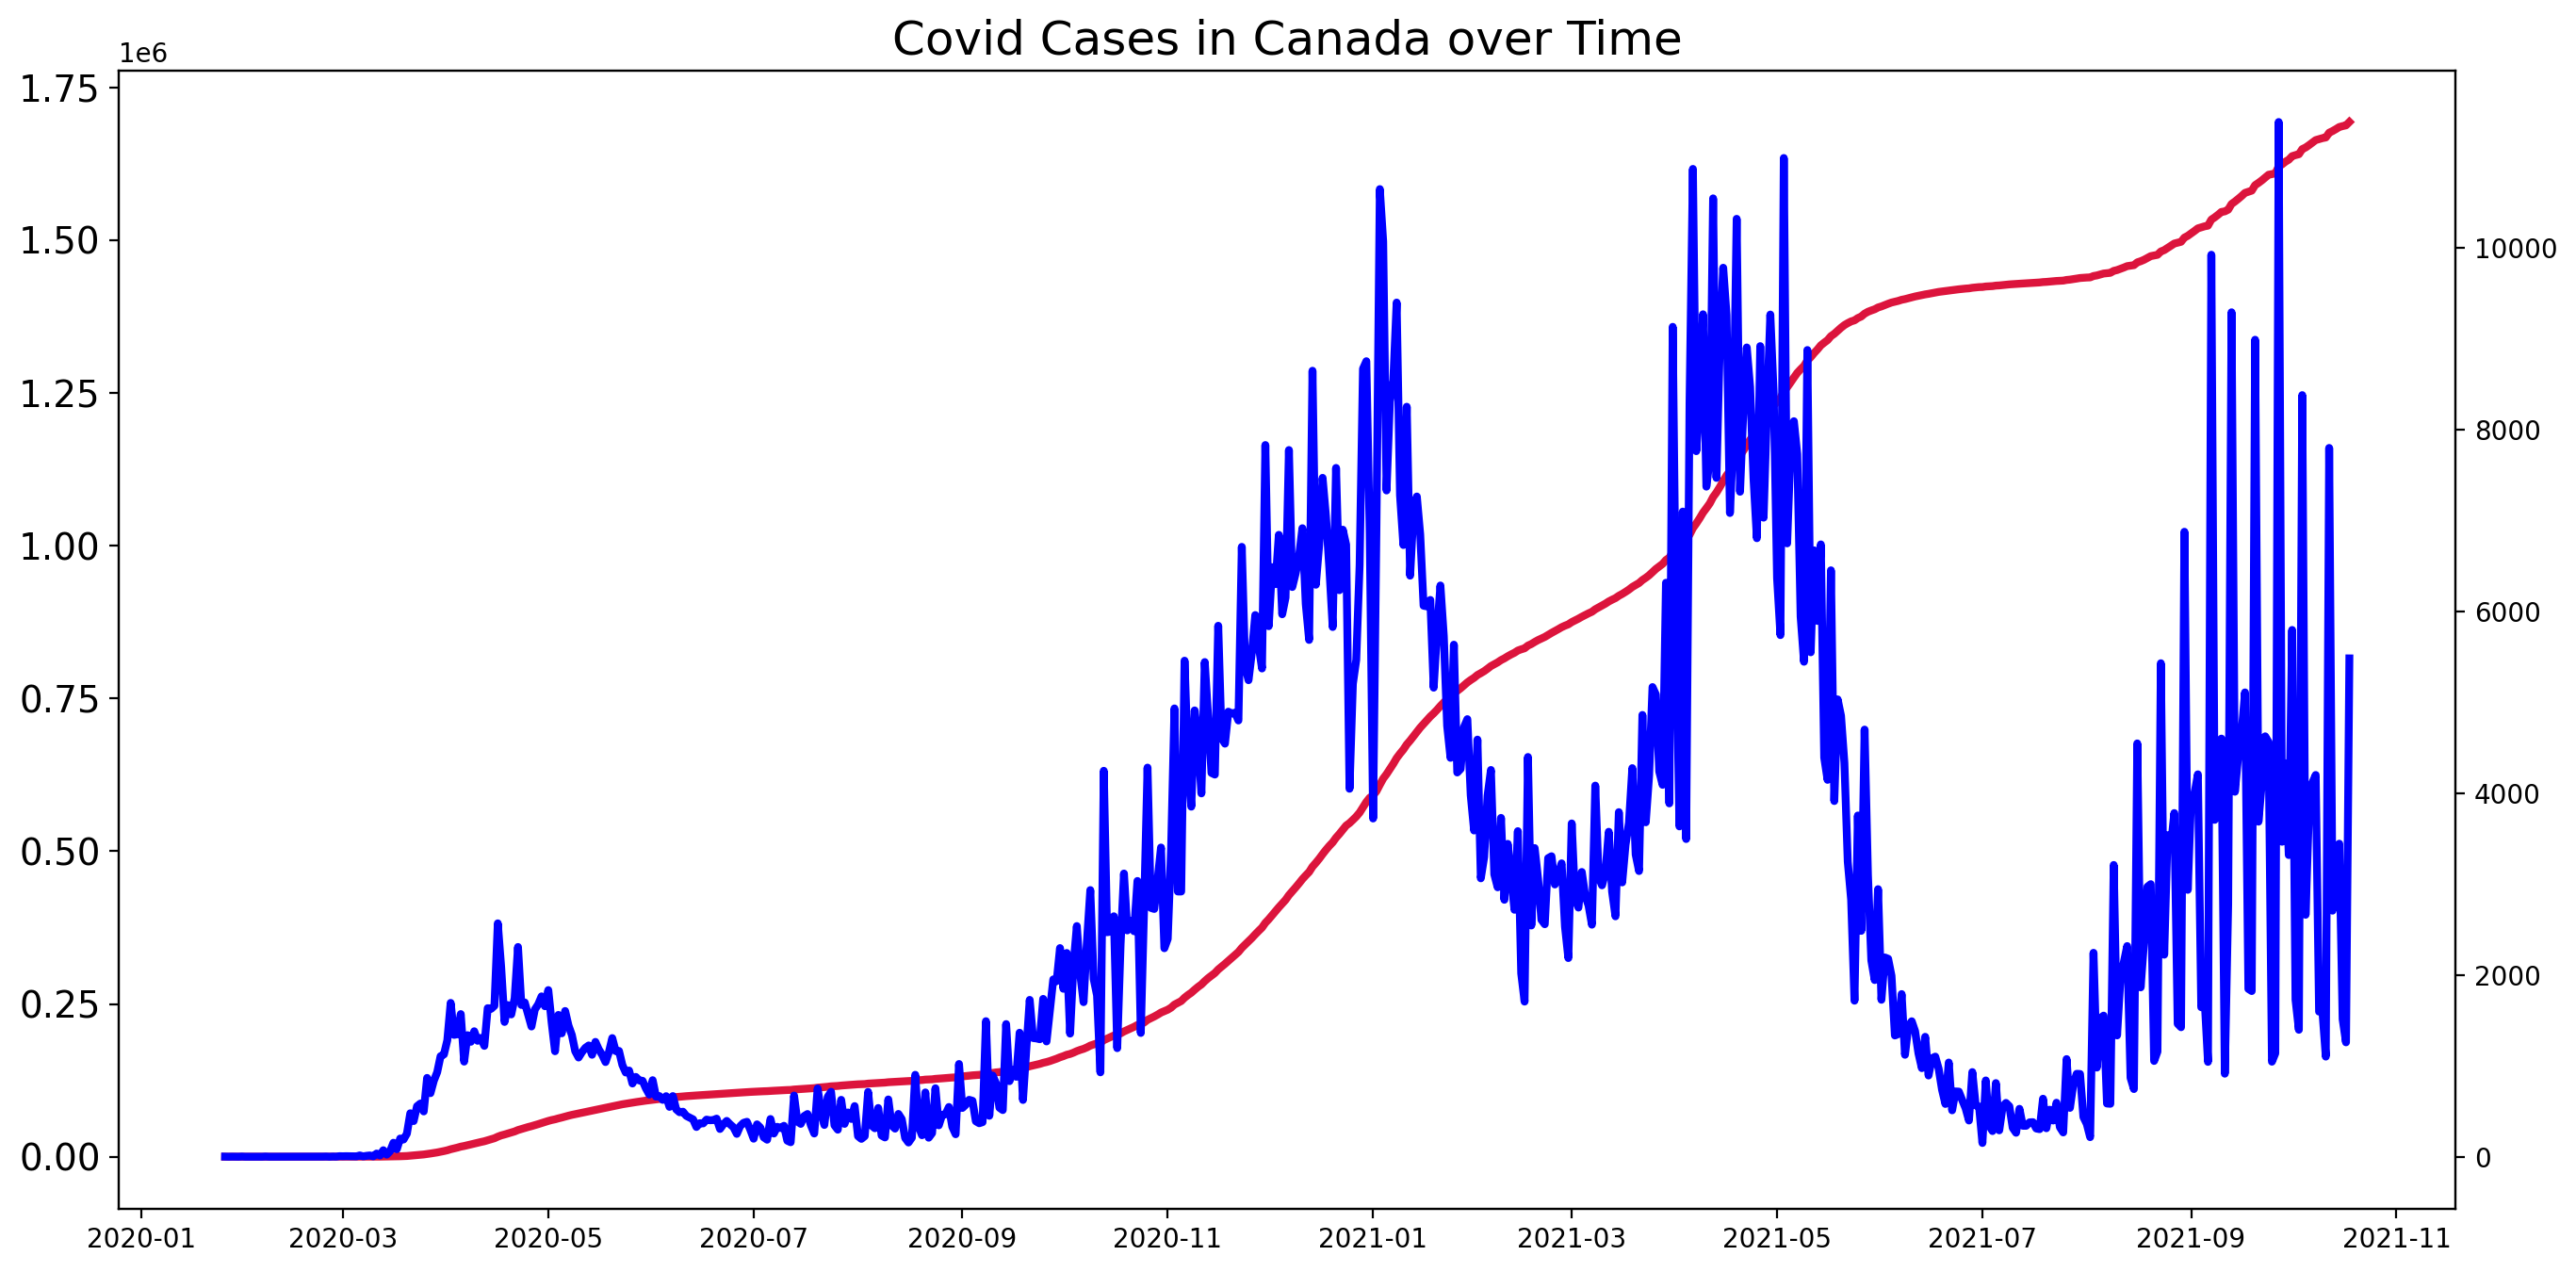

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Covid Cases in Canada over Time', fontsize=18)
plt.yticks(fontsize=14)

 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
  
ax1.plot(covid_death_canada.date,
         covid_death_canada.total_cases,  
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(covid_death_canada.date,
         covid_death_canada.new_cases,          
        c='blue', 
        linewidth=3,)
 
plt.show()

Analysing the graph, we can see the different waves in Canada

# Visualisation of the total deaths in Canada

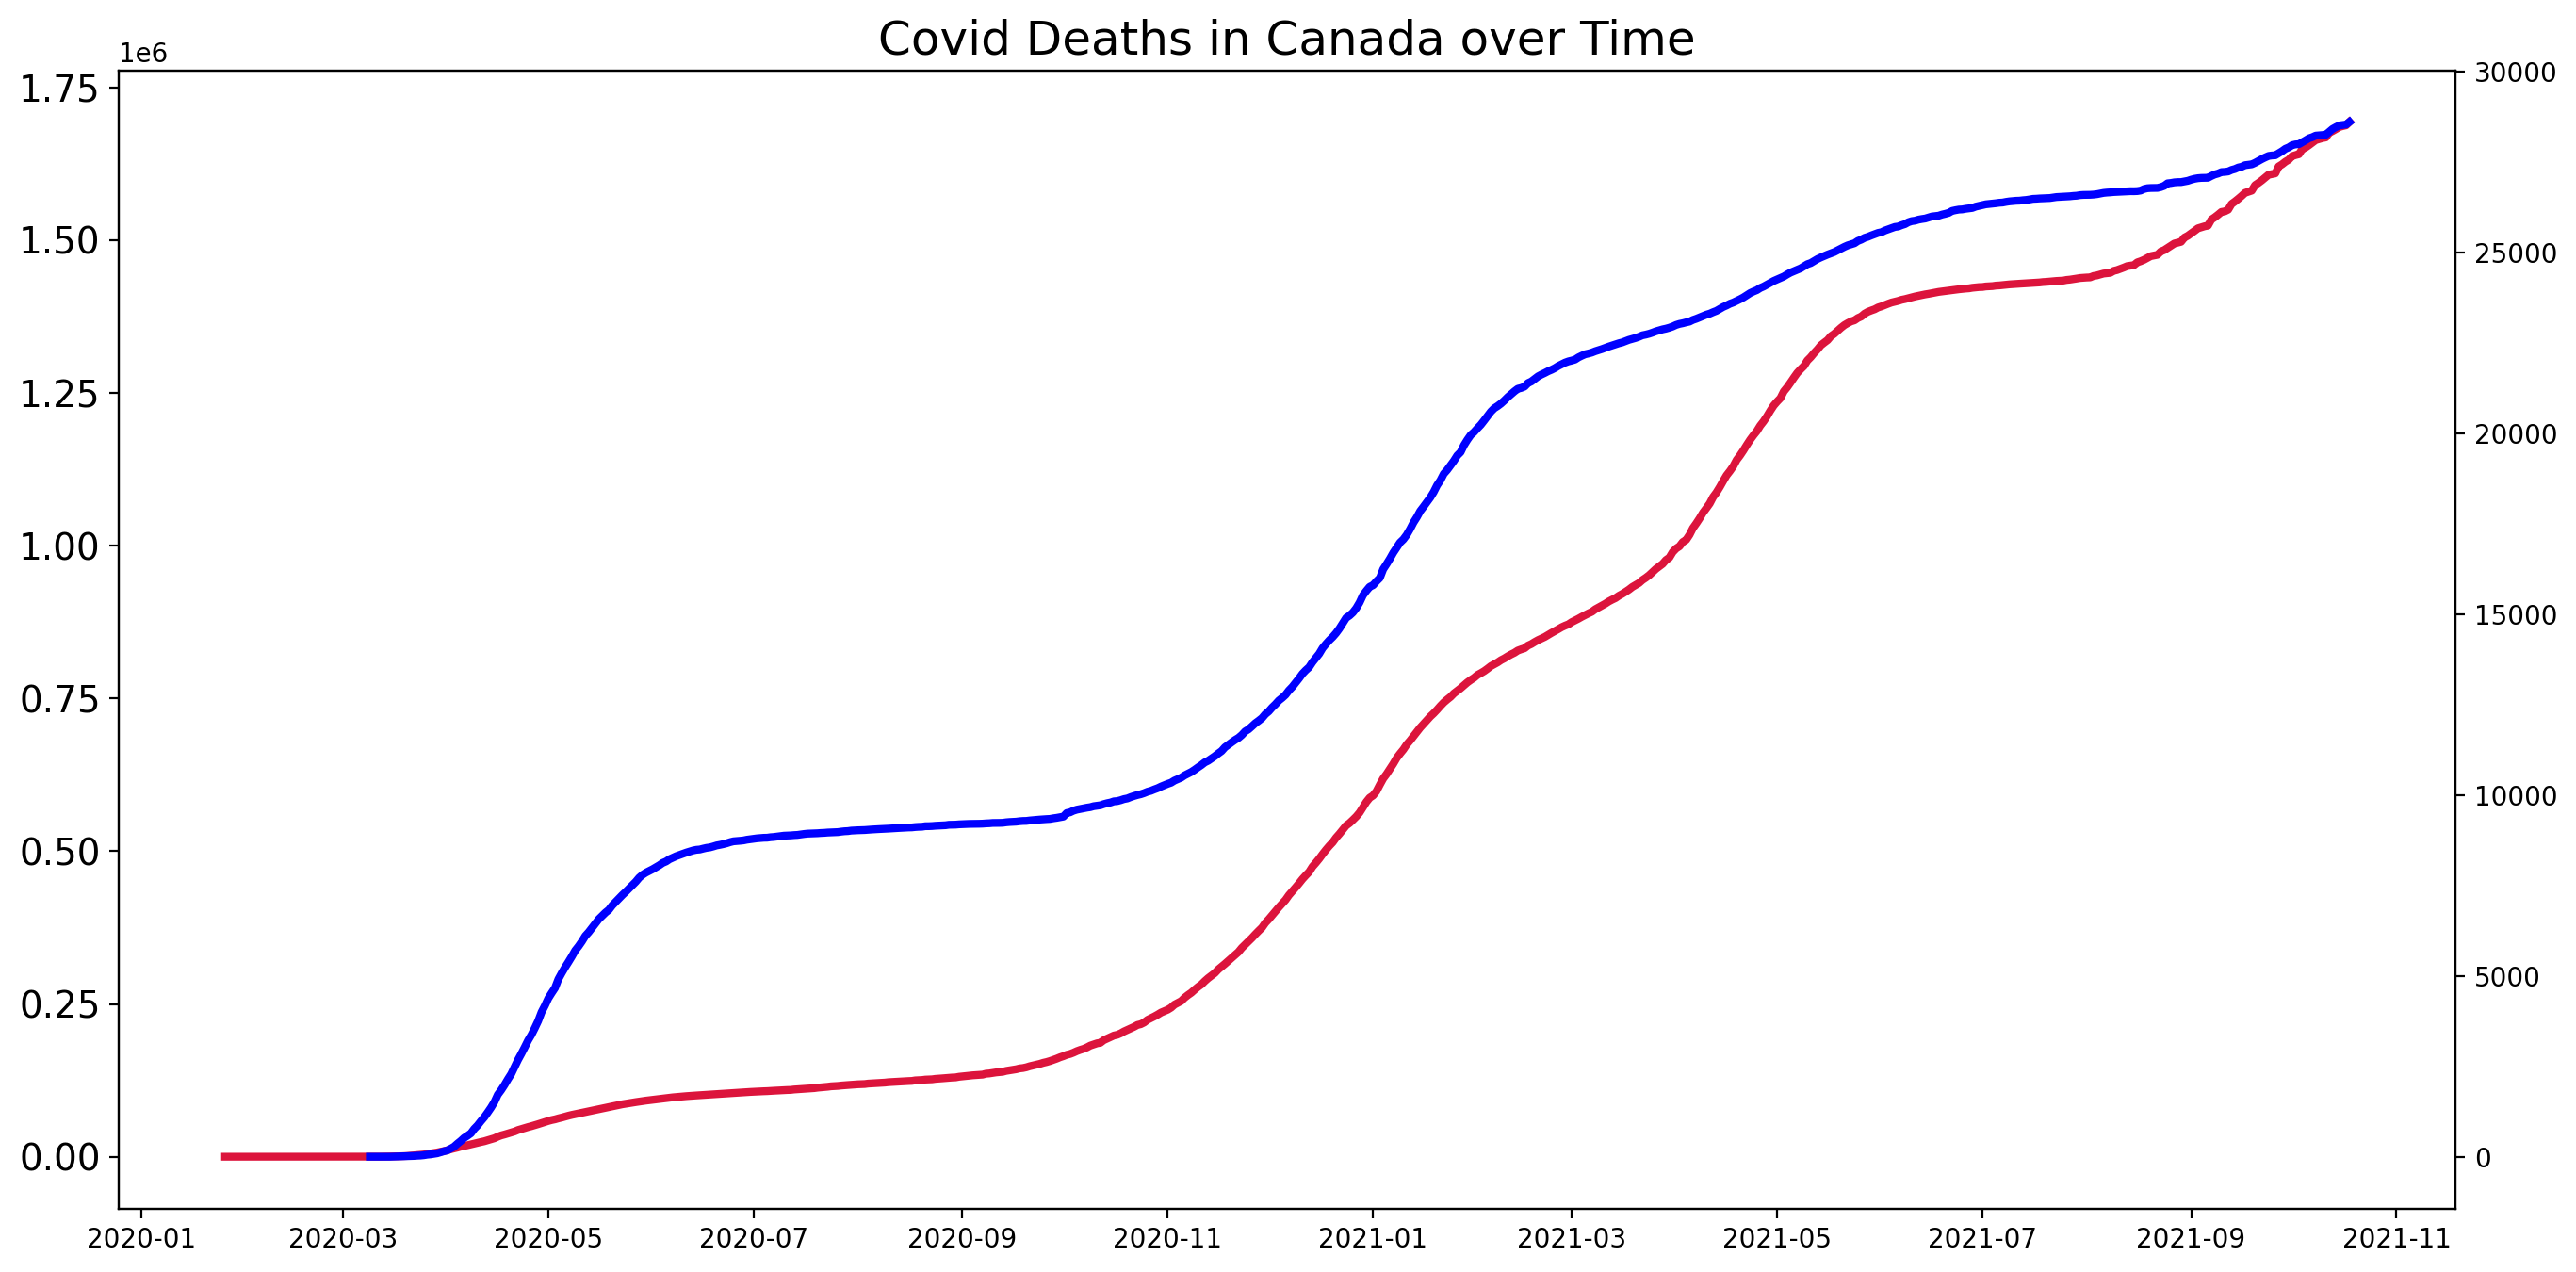

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Covid Deaths in Canada over Time', fontsize=18)
plt.yticks(fontsize=14)

 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
  
ax1.plot(covid_death_canada.date,
         covid_death_canada.total_cases,  
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(covid_death_canada.date,
         covid_death_canada.total_deaths,          
        c='blue', 
        linewidth=3,)
 
plt.show()

Here we can see total death (blue) plotted against total cases in Canada. Now let's analyse the total deaths and new_deaths

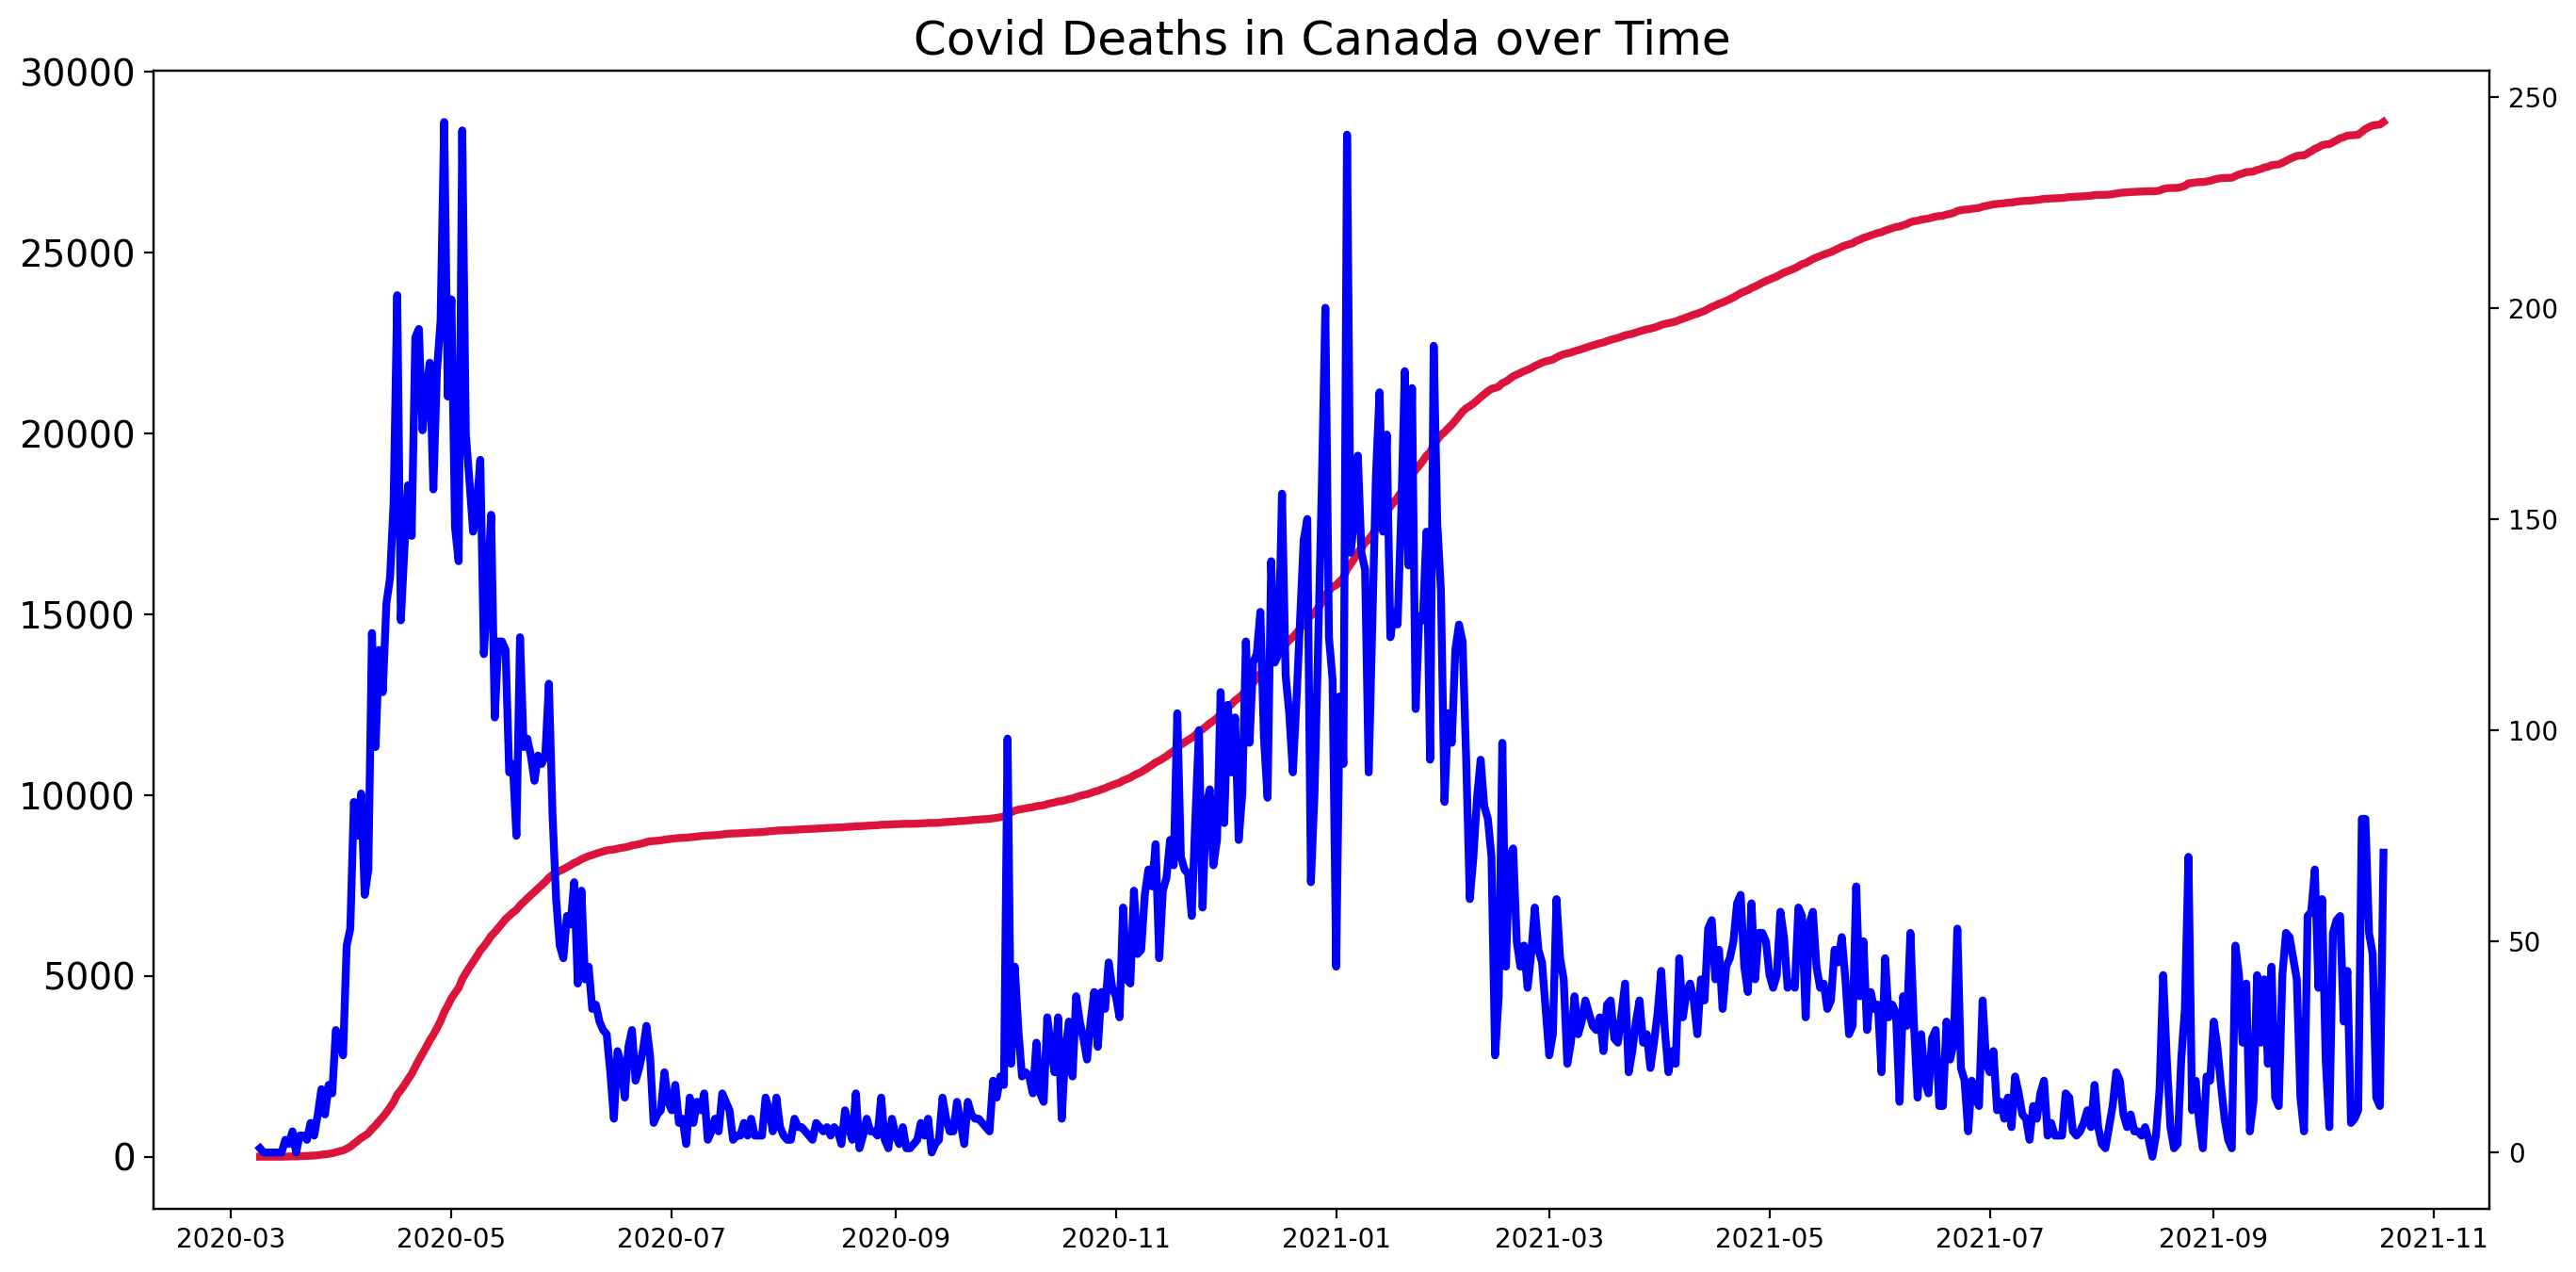

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Covid Deaths in Canada over Time', fontsize=18)
plt.yticks(fontsize=14)

 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
  
ax1.plot(covid_death_canada.date,
         covid_death_canada.total_deaths,  
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(covid_death_canada.date,
         covid_death_canada.new_deaths,          
        c='blue', 
        linewidth=3,)
 
plt.show()

We can see that new deaths have been decreasing after the second wave

# <h1> Covid Analysis - Vaccinations in Canada

Reading data

In [ ]:
covid_vaccination_data = pd.read_excel('covid_vaccinations.xlsx')

### Data Exploration & Cleaning
Preliminary data exploration.


In [ ]:
covid_vaccination_data.shape

(124675, 43)

In [ ]:
covid_vaccination_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolut

In [ ]:
covid_vaccination_data.describe()

,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,"53,513.00","53,660.00","53,660.00","53,513.00","64,538.00","64,538.00","60,633.00","59,992.00","29,518.00","28,056.00","24,948.00","3,714.00","24,463.00","52,970.00","29,518.00","28,056.00","24,948.00","3,714.00","52,970.00","104,362.00","115,149.00","109,890.00","108,672.00","109,289.00","110,544.00","73,981.00","110,148.00","113,629.00","85,830.00","84,586.00","55,433.00","100,133.00","118,253.00","110,240.00","4,494.00","4,494.00","4,494.00","4,494.00"
mean,"55,769.35","11,158,804.96",473.29,2.48,"52,072.25",2.36,0.09,160.04,"73,766,280.41","39,535,885.79","26,105,996.94","1,472,774.64","809,427.60","386,923.21",47.00,27.78,21.38,2.05,"3,480.39",56.73,398.30,30.51,8.75,5.54,"19,247.71",13.50,259.84,8.02,10.59,32.74,50.89,3.03,73.26,0.73,"29,717.78",8.24,15.50,723.94
std,"193,826.03","46,724,680.20","1,152.29",6.57,"174,377.01",5.63,0.10,846.87,"415,423,212.23","230,320,171.73","158,768,948.82","4,293,170.60","3,758,717.24","2,537,283.00",47.29,25.11,22.51,5.76,"4,279.43",20.64,"1,858.28",9.12,6.19,4.22,"20,061.23",19.99,119.80,4.28,10.50,13.51,31.83,2.46,7.54,0.15,"84,270.52",15.76,31.22,"1,111.83"
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.39,"-31,959.40",-27.35,-95.92,"-1,728.84"
25%,"2,073.00","241,419.00",20.97,0.18,"2,221.00",0.20,0.02,7.90,"282,937.75","212,581.00","116,420.25",96.25,"5,673.00",953.00,5.70,4.29,2.52,0.00,552.00,42.59,36.25,22.20,3.47,2.06,"4,449.90",0.60,168.71,5.31,1.90,21.60,20.86,1.30,67.92,0.60,-236.35,-1.26,-1.20,-52.27
50%,"7,516.00","1,218,094.50",106.37,0.74,"8,020.50",0.81,0.05,19.40,"2,102,582.00","1,397,887.50","965,004.00","18,931.50","32,867.00","7,659.50",29.98,20.62,12.21,0.02,"2,211.00",57.41,83.48,29.70,6.38,3.87,"12,951.84",2.20,243.81,7.11,6.30,31.40,49.84,2.40,74.62,0.74,"1,789.45",4.79,6.07,293.32
75%,"29,037.00","4,980,240.50",435.32,2.28,"31,183.75",2.34,0.12,57.60,"11,961,404.00","7,438,110.75","5,447,248.00","690,076.00","189,842.00","53,566.00",80.02,48.51,36.26,0.79,"5,085.75",72.22,209.59,39.10,14.18,8.68,"27,216.44",21.20,329.94,10.08,19.30,41.30,83.24,4.00,78.74,0.85,"18,552.80",13.32,21.62,"1,254.38"
max,"3,740,296.00","602,523,913.00","15,840.71",325.76,"3,080,396.00",90.04,0.97,"50,000.00","6,701,592,687.00","3,761,333,184.00","2,855,781,396.00","45,878,836.00","56,277,052.00","43,389,724.00",246.47,118.64,118.04,43.88,"117,497.00",100.00,"20,546.77",48.20,27.05,18.49,"116,935.60",77.60,724.42,30.53,44.00,78.10,100.00,13.80,86.75,0.96,"746,026.50",106.83,373.28,"6,109.08"


Let's analyse vaccination data in Canada

In [ ]:
covid_vaccination_canada = covid_vaccination_data[covid_vaccination_data.location=='Canada']

In [ ]:
covid_vaccination_canada.describe()

,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,594.00,603.00,603.00,594.00,620.00,620.00,620.00,617.00,309.00,303.00,286.00,9.00,308.00,308.00,309.00,303.00,286.00,9.00,308.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,632.00,0.00,632.00,632.00,632.00,71.00,71.00,71.00,71.00
mean,"75,990.37","18,771,325.45",493.10,2.00,"72,331.66",1.90,0.04,49.50,"24,492,982.41","14,948,832.11","9,995,960.19","323,877.89","187,435.90","186,638.46",64.34,39.27,26.26,0.85,"4,902.76",64.61,4.04,41.40,16.98,10.80,"44,017.59",0.50,105.60,7.37,12.00,16.60,nan,2.50,82.43,0.93,"10,143.00",3.52,4.79,266.44
std,"39,273.61","14,967,110.38",393.17,1.03,"37,989.47",1.00,0.02,42.49,"21,998,768.23","11,788,823.73","11,114,657.69","33,163.63","160,345.19","154,424.17",57.79,30.97,29.20,0.09,"4,056.54",18.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,"7,232.67",2.88,7.07,189.99
min,18.00,0.00,0.00,0.00,6.00,0.00,0.00,7.10,5.00,5.00,430.00,"276,522.00",0.00,718.00,0.00,0.00,0.00,0.73,19.00,2.78,4.04,41.40,16.98,10.80,"44,017.59",0.50,105.60,7.37,12.00,16.60,nan,2.50,82.43,0.93,"-2,147.00",-3.30,-5.84,-56.40
25%,"45,415.25","3,979,598.50",104.54,1.19,"45,056.25",1.18,0.01,20.10,"1,946,200.00","1,341,343.50","617,161.00","295,370.00","50,377.50","58,071.00",5.11,3.53,1.62,0.78,"1,525.25",66.20,4.04,41.40,16.98,10.80,"44,017.59",0.50,105.60,7.37,12.00,16.60,nan,2.50,82.43,0.93,"6,046.45",4.38,-0.45,158.83
50%,"76,031.00","16,922,977.00",444.55,2.00,"76,417.00",2.01,0.03,29.40,"18,805,903.00","16,363,943.00","1,913,888.50","337,313.00","127,736.00","129,549.00",49.40,42.99,5.03,0.89,"3,403.50",70.83,4.04,41.40,16.98,10.80,"44,017.59",0.50,105.60,7.37,12.00,16.60,nan,2.50,82.43,0.93,"9,877.20",4.55,3.63,259.46
75%,"108,129.00","33,921,336.00",891.07,2.84,"103,610.50",2.72,0.05,64.60,"49,455,025.00","26,898,002.50","23,304,586.75","348,555.00","307,674.25","321,048.25",129.91,70.66,61.22,0.92,"8,433.75",72.69,4.04,41.40,16.98,10.80,"44,017.59",0.50,105.60,7.37,12.00,16.60,nan,2.50,82.43,0.93,"17,751.05",4.99,9.07,466.30
max,"160,320.00","45,140,412.00","1,185.79",4.21,"136,350.00",3.58,0.14,186.50,"57,730,261.00","29,594,487.00","27,772,651.00","363,123.00","703,726.00","542,779.00",151.65,77.74,72.96,0.95,"14,258.00",75.46,4.04,41.40,16.98,10.80,"44,017.59",0.50,105.60,7.37,12.00,16.60,nan,2.50,82.43,0.93,"19,318.30",6.08,24.77,507.47


We can see almost 57.7 M people got vaccinated in Canada

### Duplicate and NaN values:  

In [ ]:
covid_vaccination_canada.duplicated().values.any()

False

In [ ]:
covid_vaccination_canada.isna().values.any()

True

In [ ]:
covid_vaccination_canada.isna().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
new_tests                                   38
total_tests                                 29
total_tests_per_thousand                    29
new_tests_per_thousand                      38
new_tests_smoothed                          12
new_tests_smoothed_per_thousand             12
positive_rate                               12
tests_per_case                              15
tests_units                                  5
total_vaccinations                         323
people_vaccinated                          329
people_fully_vaccinated                    346
total_boosters                             623
new_vaccinations                           324
new_vaccinations_smoothed                  324
total_vaccinations_per_hundred             323
people_vaccinated_per_hundred              329
people_fully_

We can see there are a lot of data, let's look only on cases, detahs and vaccination

In [ ]:
covid_vaccination_canada = covid_vaccination_canada[['date','positive_rate' ,'total_vaccinations','new_vaccinations','total_boosters']]

In [ ]:
covid_vaccination_canada.describe()

,positive_rate,total_vaccinations,new_vaccinations,total_boosters
count,620.00,309.00,308.00,9.00
mean,0.04,"24,492,982.41","187,435.90","323,877.89"
std,0.02,"21,998,768.23","160,345.19","33,163.63"
min,0.00,5.00,0.00,"276,522.00"
25%,0.01,"1,946,200.00","50,377.50","295,370.00"
50%,0.03,"18,805,903.00","127,736.00","337,313.00"
75%,0.05,"49,455,025.00","307,674.25","348,555.00"
max,0.14,"57,730,261.00","703,726.00","363,123.00"


In [ ]:
covid_vaccination_canada.isna().sum()

date                    0
positive_rate          12
total_vaccinations    323
new_vaccinations      324
total_boosters        623
dtype: int64

In [ ]:
covid_vaccination_canada.head()

,date,positive_rate,total_vaccinations,new_vaccinations,total_boosters
20163,2020-01-26,nan,nan,nan,nan
20164,2020-01-27,nan,nan,nan,nan
20165,2020-01-28,nan,nan,nan,nan
20166,2020-01-29,nan,nan,nan,nan
20167,2020-01-30,nan,nan,nan,nan


In [ ]:
covid_vaccination_canada.tail()

,date,positive_rate,total_vaccinations,new_vaccinations,total_boosters
20790,2021-10-14,0.03,"57,411,734.00","100,961.00","337,313.00"
20791,2021-10-15,0.03,"57,512,104.00","100,370.00","346,332.00"
20792,2021-10-16,0.03,"57,562,705.00","50,601.00","348,555.00"
20793,2021-10-17,0.03,"57,607,434.00","44,729.00","349,599.00"
20794,2021-10-18,0.04,"57,730,261.00","122,827.00","363,123.00"


We can see the NaN values are from the start of the pandemic.

# Cases, Deaths and Vaccination in Canada

Let's create a dataframe with data from both tables

In [ ]:
covid_analysis_canada = pd.merge(covid_death_canada, covid_vaccination_canada, on='date')

In [ ]:
covid_analysis_canada.describe()

,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %,positive_rate,total_vaccinations,new_vaccinations,total_boosters
count,632.00,632.00,589.00,589.00,632.00,632.00,589.00,620.00,309.00,308.00,9.00
mean,"2,679.37","642,096.42",48.58,"16,138.61",1.69,"38,067,913.00",3.91,0.04,"24,492,982.41","187,435.90","323,877.89"
std,"2,629.59","590,132.89",49.32,"8,845.32",1.55,0.00,2.51,0.02,"21,998,768.23","160,345.19","33,163.63"
min,0.00,1.00,-1.00,1.00,0.00,"38,067,913.00",0.34,0.00,5.00,0.00,"276,522.00"
25%,535.25,"106,494.00",11.00,"9,035.00",0.28,"38,067,913.00",1.85,0.01,"1,946,200.00","50,377.50","295,370.00"
50%,"1,649.50","424,167.50",32.00,"15,328.00",1.11,"38,067,913.00",2.56,0.03,"18,805,903.00","127,736.00","337,313.00"
75%,"4,228.75","1,322,787.75",67.00,"25,262.00",3.47,"38,067,913.00",6.42,0.05,"49,455,025.00","307,674.25","348,555.00"
max,"11,381.00","1,693,364.00",244.00,"28,616.00",4.45,"38,067,913.00",8.56,0.14,"57,730,261.00","703,726.00","363,123.00"


In [ ]:
covid_analysis_canada.head()

,date,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %,positive_rate,total_vaccinations,new_vaccinations,total_boosters
0,2020-01-26,1.00,1.00,nan,nan,0.00,"38,067,913.00",nan,nan,nan,nan,nan
1,2020-01-27,0.00,1.00,nan,nan,0.00,"38,067,913.00",nan,nan,nan,nan,nan
2,2020-01-28,1.00,2.00,nan,nan,0.00,"38,067,913.00",nan,nan,nan,nan,nan
3,2020-01-29,0.00,2.00,nan,nan,0.00,"38,067,913.00",nan,nan,nan,nan,nan
4,2020-01-30,0.00,2.00,nan,nan,0.00,"38,067,913.00",nan,nan,nan,nan,nan


In [ ]:
covid_analysis_canada.tail()

,date,new_cases,total_cases,new_deaths,total_deaths,Chance of infection in %,population,Chance of Death in %,positive_rate,total_vaccinations,new_vaccinations,total_boosters
627,2021-10-14,"3,158.00","1,681,669.00",52.00,"28,474.00",4.42,"38,067,913.00",1.69,0.03,"57,411,734.00","100,961.00","337,313.00"
628,2021-10-15,"3,443.00","1,685,112.00",47.00,"28,521.00",4.43,"38,067,913.00",1.69,0.03,"57,512,104.00","100,370.00","346,332.00"
629,2021-10-16,"1,513.00","1,686,625.00",13.00,"28,534.00",4.43,"38,067,913.00",1.69,0.03,"57,562,705.00","50,601.00","348,555.00"
630,2021-10-17,"1,258.00","1,687,883.00",11.00,"28,545.00",4.43,"38,067,913.00",1.69,0.03,"57,607,434.00","44,729.00","349,599.00"
631,2021-10-18,"5,481.00","1,693,364.00",71.00,"28,616.00",4.45,"38,067,913.00",1.69,0.04,"57,730,261.00","122,827.00","363,123.00"


In [ ]:
covid_analysis_canada = covid_analysis_canada[['date','new_cases','total_cases','new_deaths','total_deaths','new_vaccinations','total_vaccinations','Chance of infection in %','Chance of Death in %']]

In [ ]:
covid_analysis_canada.sample(n=10)

,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,Chance of infection in %,Chance of Death in %
333,2020-12-24,"6,732.00","541,936.00",150.00,"14,902.00","10,309.00","45,398.00",1.42,2.75
615,2021-10-02,"1,728.00","1,639,169.00",22.00,"27,996.00","58,484.00","56,399,299.00",4.31,1.71
347,2021-01-07,"8,541.00","642,978.00",165.00,"16,704.00","36,086.00","219,446.00",1.69,2.60
548,2021-07-27,537.00,"1,435,403.00",7.00,"26,561.00","278,758.00","48,255,004.00",3.77,1.85
404,2021-03-05,"2,873.00","886,492.00",41.00,"22,193.00","85,757.00","2,255,174.00",2.33,2.50
133,2020-06-07,667.00,"97,164.00",41.00,"8,269.00",nan,nan,0.26,8.51
205,2020-08-18,901.00,"124,936.00",10.00,"9,118.00",nan,nan,0.33,7.30
387,2021-02-16,"4,397.00","836,455.00",97.00,"21,395.00","26,157.00","1,308,918.00",2.20,2.56
487,2021-05-27,"4,698.00","1,379,674.00",50.00,"25,412.00","408,267.00","22,347,313.00",3.62,1.84
28,2020-02-23,0.00,9.00,nan,nan,nan,nan,0.00,nan


In [ ]:
From the preliminary analysis, we can see that the Chance of Death in % after infection in Canada has decreased as the total_vaccinations got higher number. Let see this in charts!

# Visualization of New Cases vs Vaccination in Canada

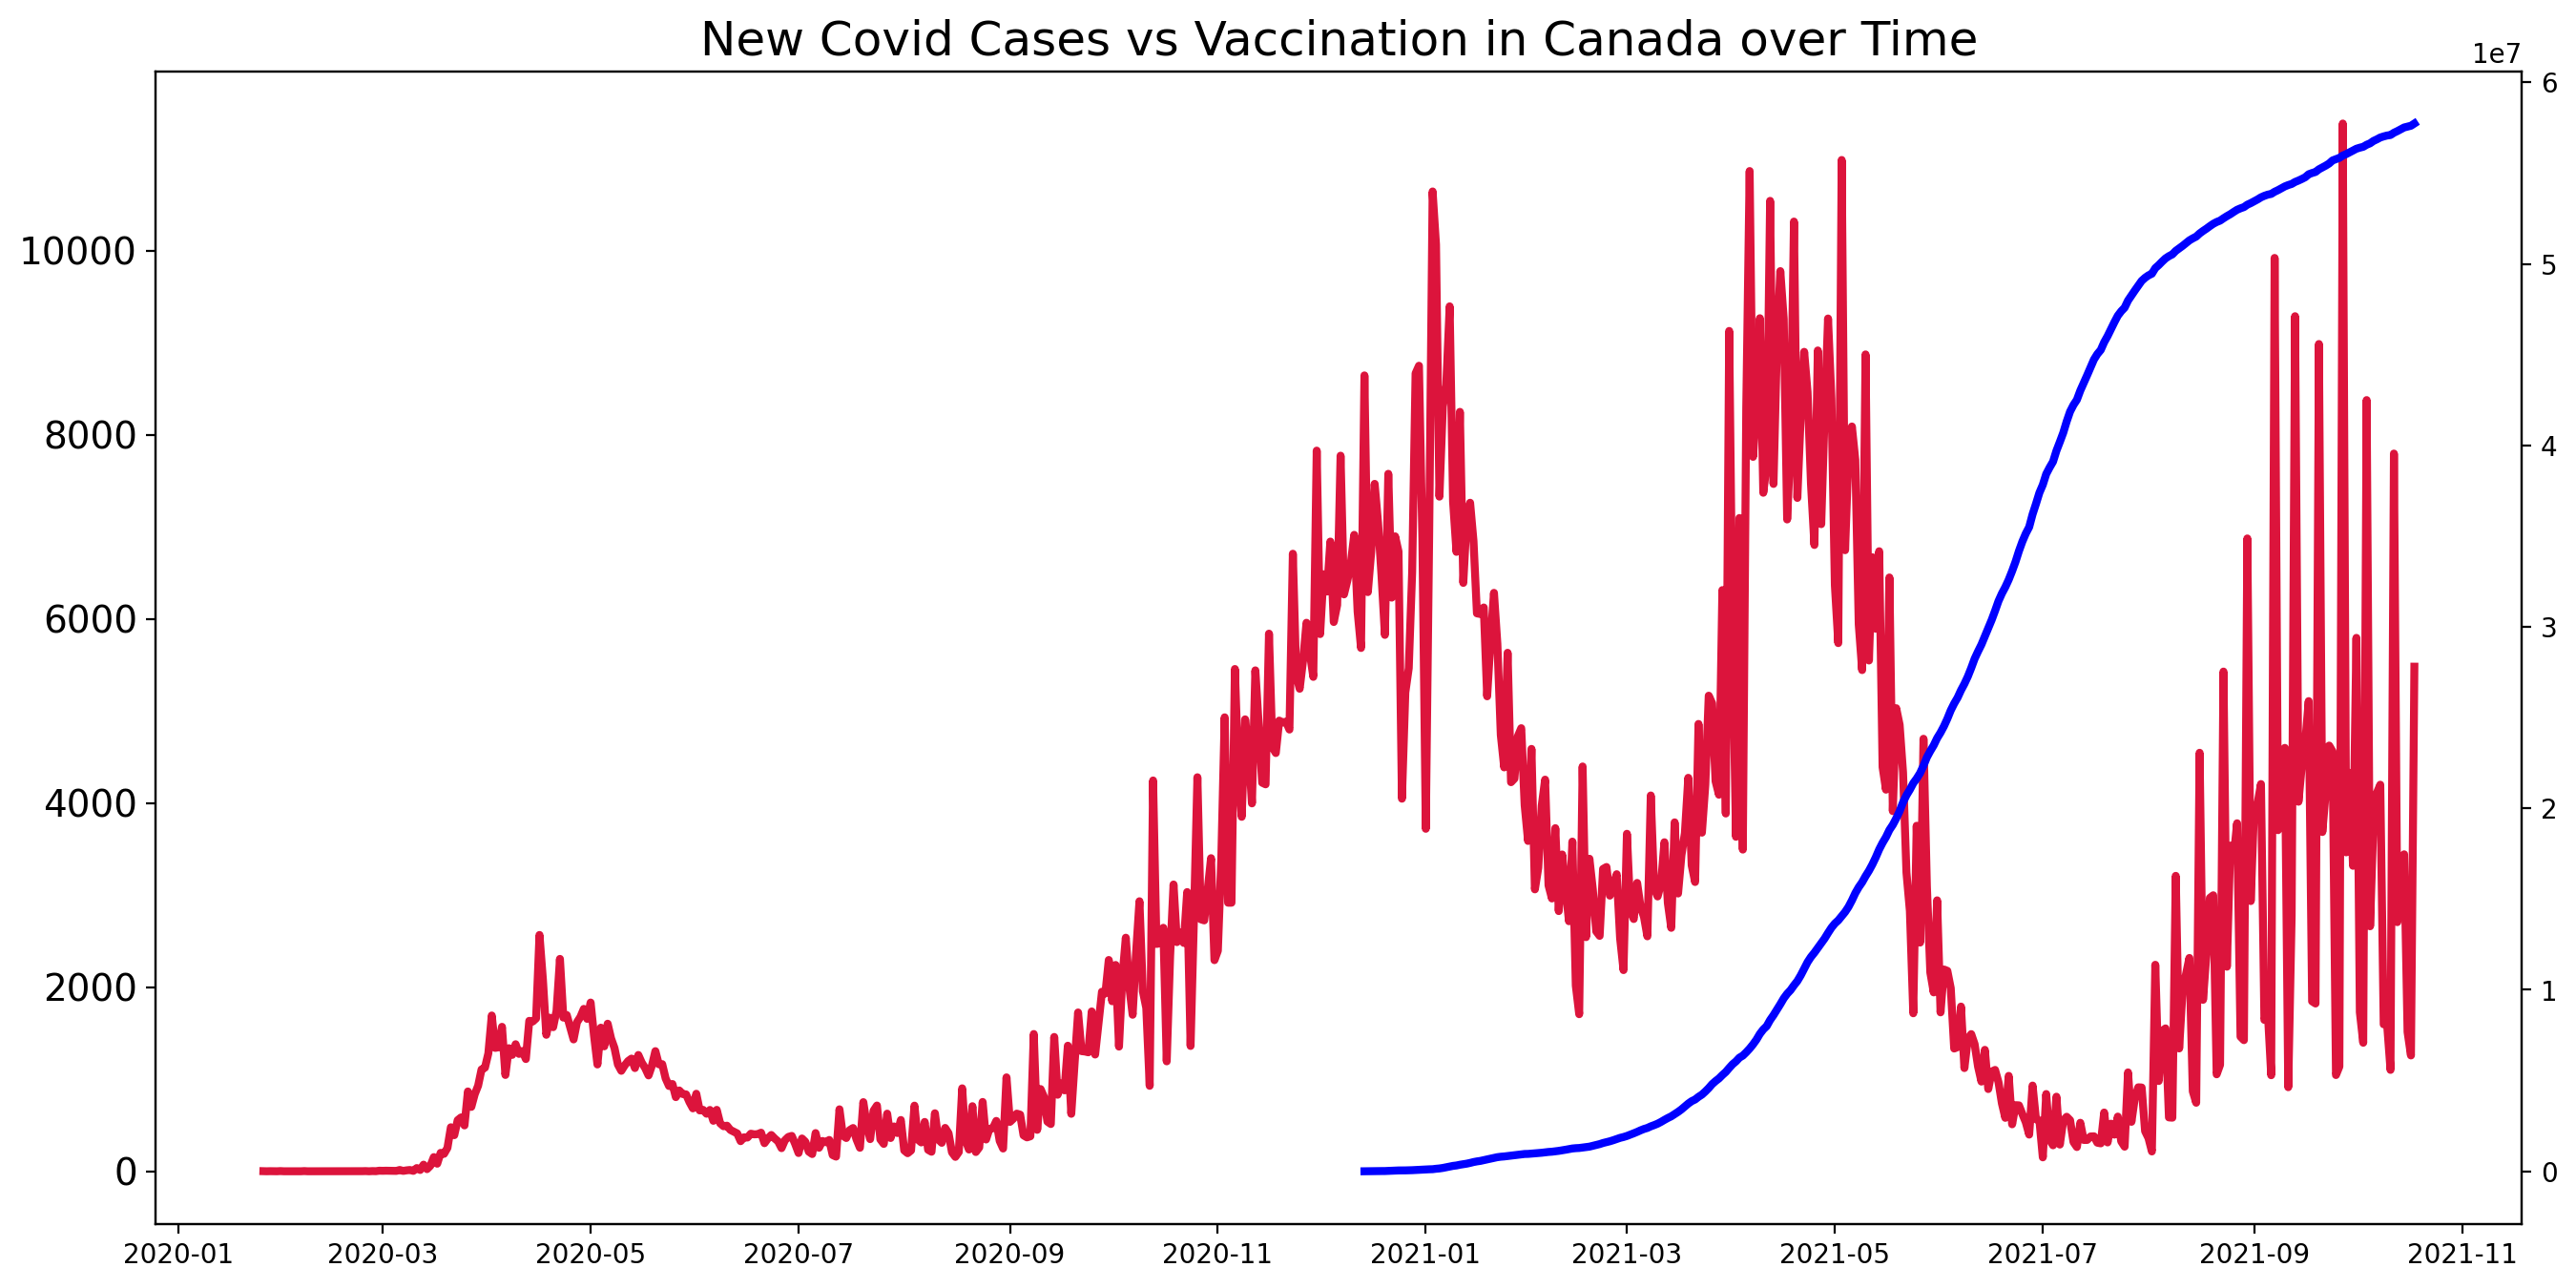

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('New Covid Cases vs Vaccination in Canada over Time', fontsize=18)
plt.yticks(fontsize=14)

 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
  
ax1.plot(covid_analysis_canada.date,
         covid_analysis_canada.new_cases,  
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(covid_analysis_canada.date,
         covid_analysis_canada.total_vaccinations,          
        c='blue', 
        linewidth=3,)
 
plt.show()

After vaccinations, the cases have been low mostly compared to covid waves before vaccinations. But Covid vaccines changes our risk of catching COVID-19 and becoming ill, It doesn't change your risk of exposure to the virus out in the community. That's why we can still see some peak towards the end

# Visualization of New Deaths vs Vaccination in Canada


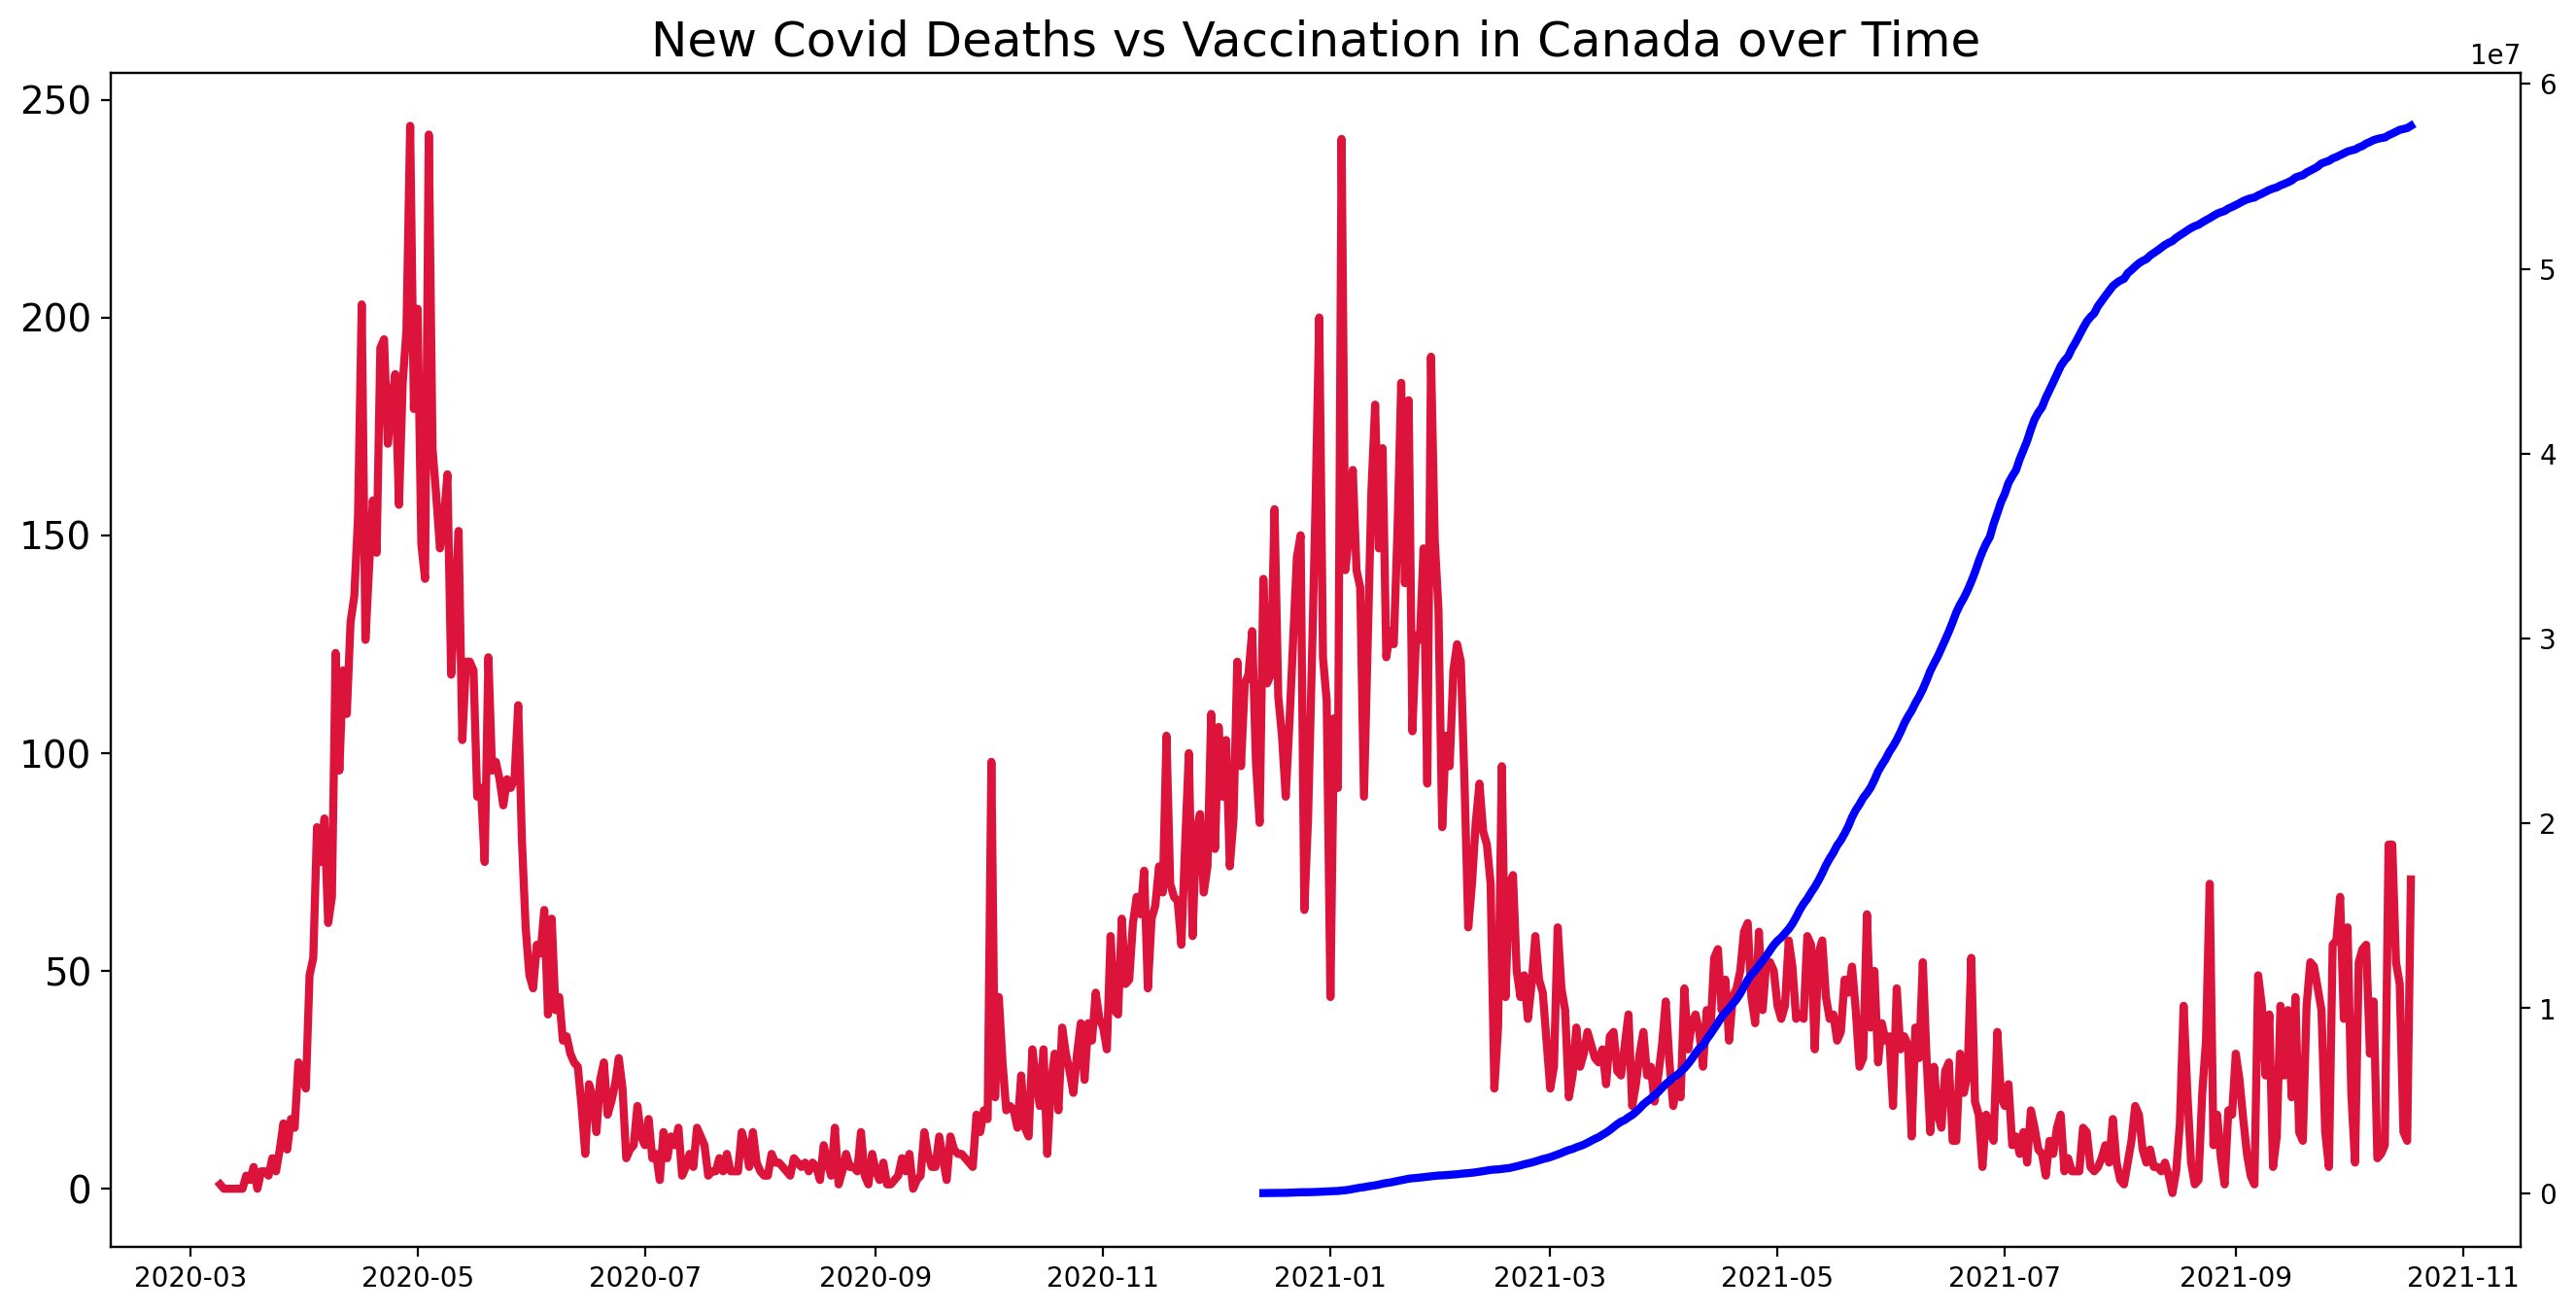

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('New Covid Deaths vs Vaccination in Canada over Time', fontsize=18)
plt.yticks(fontsize=14)

 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
  
ax1.plot(covid_analysis_canada.date,
         covid_analysis_canada.new_deaths,  
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(covid_analysis_canada.date,
         covid_analysis_canada.total_vaccinations,          
        c='blue', 
        linewidth=3,)
 
plt.show()

<h2>Yes, new covid-related deaths have been reduced considerably after vaccinations!!!! <h2>

# Covid Analysis - World

In [ ]:
covid_death_data.describe()


,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,"123,799.00","117,942.00","117,938.00","116,924.00","107,048.00","107,201.00","116,924.00","117,322.00","117,318.00","116,309.00","106,441.00","106,594.00","116,309.00","100,541.00","15,225.00","15,225.00","17,363.00","17,363.00","1,277.00","1,277.00","2,103.00","2,103.00"
mean,"121,898,313.89","1,489,929.38","6,451.16","6,475.67","37,455.74",144.11,131.65,"18,494.06",84.37,84.44,383.85,1.58,1.44,1.00,882.26,21.68,"4,057.67",154.52,211.14,16.50,"2,986.19",81.24
std,"674,965,365.42","9,946,405.73","39,209.21","38,824.66","223,017.15",786.03,736.65,"31,167.29",195.67,164.97,642.98,4.13,3.10,0.34,"2,833.80",24.54,"11,447.79",209.05,492.35,31.03,"10,456.40",137.45
min,47.00,1.00,"-74,347.00","-6,223.00",1.00,"-1,918.00",-232.14,0.00,"-3,125.83",-272.97,0.00,-75.91,-10.84,-0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,015,490.00","2,080.00",3.00,9.57,70.00,0.00,0.00,367.43,0.29,1.58,10.76,0.00,0.00,0.83,21.00,3.37,99.00,21.32,5.92,1.47,38.26,9.30
50%,"9,442,867.00","22,024.00",93.00,116.86,622.00,2.00,1.71,"2,884.98",10.86,15.06,71.97,0.15,0.20,1.01,102.00,12.28,489.00,69.03,26.10,5.70,224.12,33.42
75%,"33,933,611.00","223,641.75",933.75,987.00,"5,447.00",19.00,15.86,"22,779.87",82.27,91.98,473.65,1.38,1.37,1.17,506.00,33.08,"2,307.00",200.58,138.85,17.89,"1,205.98",102.68
max,"7,874,965,730.00","241,132,266.00","905,955.00","826,438.43","4,905,094.00","18,006.00","14,703.14","221,888.59","8,620.69","3,385.47","5,991.77",203.51,94.80,5.87,"28,891.00",192.27,"133,253.00","1,544.08","4,002.46",279.22,"116,307.00","1,361.14"


# Countries with highest infection number

In [ ]:
countries = covid_death_data.groupby(['location'])
countries.tail()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
598,AFG,Asia,Afghanistan,2021-10-14,"39,835,428.00","155,682.00",55.00,36.14,"7,238.00",4.00,2.43,"3,908.13",1.38,0.91,181.70,0.10,0.06,0.92,nan,nan,nan,nan,nan,nan,nan,nan
599,AFG,Asia,Afghanistan,2021-10-15,"39,835,428.00","155,688.00",6.00,34.29,"7,238.00",0.00,2.43,"3,908.28",0.15,0.86,181.70,0.00,0.06,0.92,nan,nan,nan,nan,nan,nan,nan,nan
600,AFG,Asia,Afghanistan,2021-10-16,"39,835,428.00","155,739.00",51.00,39.00,"7,238.00",0.00,2.43,"3,909.56",1.28,0.98,181.70,0.00,0.06,0.92,nan,nan,nan,nan,nan,nan,nan,nan
601,AFG,Asia,Afghanistan,2021-10-17,"39,835,428.00","155,764.00",25.00,36.57,"7,243.00",5.00,2.57,"3,910.19",0.63,0.92,181.82,0.13,0.07,0.93,nan,nan,nan,nan,nan,nan,nan,nan
602,AFG,Asia,Afghanistan,2021-10-18,"39,835,428.00","155,776.00",12.00,33.71,"7,246.00",3.00,2.57,"3,910.49",0.30,0.85,181.90,0.07,0.07,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124670,ZWE,Africa,Zimbabwe,2021-10-14,"15,092,171.00","132,251.00",143.00,104.00,"4,655.00",7.00,3.43,"8,762.89",9.47,6.89,308.44,0.46,0.23,0.72,nan,nan,nan,nan,nan,nan,nan,nan
124671,ZWE,Africa,Zimbabwe,2021-10-15,"15,092,171.00","132,285.00",34.00,82.86,"4,655.00",0.00,3.00,"8,765.14",2.25,5.49,308.44,0.00,0.20,0.72,nan,nan,nan,nan,nan,nan,nan,nan
124672,ZWE,Africa,Zimbabwe,2021-10-16,"15,092,171.00","132,333.00",48.00,81.57,"4,657.00",2.00,3.00,"8,768.32",3.18,5.41,308.57,0.13,0.20,0.72,nan,nan,nan,nan,nan,nan,nan,nan
124673,ZWE,Africa,Zimbabwe,2021-10-17,"15,092,171.00","132,368.00",35.00,81.71,"4,658.00",1.00,3.00,"8,770.64",2.32,5.41,308.64,0.07,0.20,0.72,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
data_countries = countries.agg({'location':pd.Series.any,'total_cases': pd.Series.max, 'population': pd.Series.max})

In [ ]:
data_countries.sample(n=10)

,,location,total_cases,population
location,iso_code,,,
Philippines,PHL,Philippines,"2,727,286.00","111,046,910.00"
Comoros,COM,Comoros,"4,190.00","888,456.00"
Kyrgyzstan,KGZ,Kyrgyzstan,"179,913.00","6,628,347.00"
Panama,PAN,Panama,"470,395.00","4,381,583.00"
Togo,TGO,Togo,"25,903.00","8,478,242.00"
New Zealand,NZL,New Zealand,"5,154.00","4,860,642.00"
Jersey,JEY,Jersey,nan,"101,073.00"
Qatar,QAT,Qatar,"237,996.00","2,930,524.00"
Jordan,JOR,Jordan,"843,204.00","10,269,022.00"


In [ ]:
total_cases =  pd.to_numeric(data_countries.total_cases)
population =  pd.to_numeric(data_countries.population)
infection_rate = (total_cases/population)*100
data_countries['Infection rate in %'] = infection_rate
data_countries.sample(n=10)

,,location,total_cases,population,Infection rate in %
location,iso_code,,,,
North America,OWID_NAM,North America,"54,178,461.00","596,581,283.00",9.08
Marshall Islands,MHL,Marshall Islands,4.00,"59,618.00",0.01
Fiji,FJI,Fiji,"51,846.00","902,899.00",5.74
Finland,FIN,Finland,"151,207.00","5,548,361.00",2.73
Turkmenistan,TKM,Turkmenistan,nan,"6,117,933.00",nan
Wallis and Futuna,WLF,Wallis and Futuna,nan,"11,094.00",nan
Sint Maarten (Dutch part),SXM,Sint Maarten (Dutch part),nan,"43,421.00",nan
Benin,BEN,Benin,"24,560.00","12,451,031.00",0.20
Haiti,HTI,Haiti,"23,042.00","11,541,683.00",0.20


In [ ]:
data_countries.sort_values(['total_cases'], inplace=True)
data_countries = data_countries.dropna()
data_countries.tail(10)

,,location,total_cases,population,Infection rate in %
location,iso_code,,,,
United Kingdom,GBR,United Kingdom,"8,537,650.00","68,207,114.00",12.52
Brazil,BRA,Brazil,"21,651,910.00","213,993,441.00",10.12
India,IND,India,"34,094,373.00","1,393,409,033.00",2.45
South America,OWID_SAM,South America,"38,117,860.00","434,260,137.00",8.78
European Union,OWID_EUN,European Union,"38,968,302.00","447,189,915.00",8.71
United States,USA,United States,"45,050,910.00","332,915,074.00",13.53
North America,OWID_NAM,North America,"54,178,461.00","596,581,283.00",9.08
Europe,OWID_EUR,Europe,"62,138,139.00","748,962,983.00",8.30
Asia,OWID_ASI,Asia,"78,028,663.00","4,678,444,992.00",1.67


Here we can see we also get the total_cases in World and continents here. Let's remove those.

In [ ]:
data_countries_only = data_countries[~data_countries.location.isin(['World','Asia', 'Europe', 'North America', 'South America', 'European Union', 'Africa', 'Oceanea'])]

## Top 20 countries with highest number of Covid cases

In [ ]:
top20_countries = data_countries_only[-20:]

In [ ]:
h_bar = px.bar(x=top20_countries.total_cases,
               y=top20_countries.location,
               orientation='h',
               color=top20_countries.total_cases,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Cases')
 
h_bar.update_layout(xaxis_title='Number of Cases', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

## Top 20 countries with highest percentage of Covid cases

In the above chart, we only see the total cases in a country. Let's see what is the infection rate in reference with population.

In [ ]:
data_countries_only.sort_values(['Infection rate in %'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
top20_countries = data_countries_only[-20:]

In [ ]:
h_bar = px.bar(x=top20_countries['Infection rate in %'],
               y=top20_countries.location,
               orientation='h',
               color=top20_countries['Infection rate in %'],
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Infection rate')
 
h_bar.update_layout(xaxis_title='Percent of Cases', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

## Top 20 countries with Least number of Covid cases

In [ ]:
top20_countries_least_cases = data_countries_only[0:20]

In [ ]:
h_bar = px.bar(x=top20_countries_least_cases.total_cases,
               y=top20_countries_least_cases.location,
               orientation='h',
               color=top20_countries_least_cases.total_cases,
               color_continuous_scale='Viridis',
               title='Top 20 Countries with least Number of Cases')
 
h_bar.update_layout(xaxis_title='Number of Cases', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Visualising Total Number of Cases using a Choropleth Map

In [ ]:
countries = covid_death_data.groupby(['location', 'iso_code'])
data_countries = countries.agg({'iso_code':pd.Series.any,'location':pd.Series.any,'total_cases': pd.Series.max})

In [ ]:
data_countries.sort_values(['total_cases'], inplace=True)
data_countries = data_countries.dropna()
data_countries.tail(10)

,,iso_code,location,total_cases
location,iso_code,,,
United Kingdom,GBR,GBR,United Kingdom,"8,537,650.00"
Brazil,BRA,BRA,Brazil,"21,651,910.00"
India,IND,IND,India,"34,094,373.00"
South America,OWID_SAM,OWID_SAM,South America,"38,117,860.00"
European Union,OWID_EUN,OWID_EUN,European Union,"38,968,302.00"
United States,USA,USA,United States,"45,050,910.00"
North America,OWID_NAM,OWID_NAM,North America,"54,178,461.00"
Europe,OWID_EUR,OWID_EUR,Europe,"62,138,139.00"
Asia,OWID_ASI,OWID_ASI,Asia,"78,028,663.00"


In [ ]:
data_countries_only = data_countries[~data_countries.location.isin(['World','Asia', 'Europe', 'North America', 'South America', 'European Union', 'Africa', 'Oceanea'])]

In [ ]:
world_map = px.choropleth(data_countries_only,
                          locations='iso_code',
                          color='total_cases', 
                          hover_name='location', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Countries with highest deaths related to Covid-19

In [ ]:
countries = covid_death_data.groupby(['location'])


In [ ]:
data_countries = countries.agg({'location':pd.Series.any,'total_deaths': pd.Series.max,'total_cases': pd.Series.max, 'population': pd.Series.max})

In [ ]:
data_countries.sample(n=10)

,location,total_deaths,total_cases,population
location,,,,
Sri Lanka,Sri Lanka,"13,507.00","532,218.00","21,497,306.00"
Pakistan,Pakistan,"28,300.00","1,265,650.00","225,199,929.00"
Malta,Malta,459.00,"37,464.00","514,564.00"
Congo,Congo,231.00,"15,962.00","5,657,017.00"
Hungary,Hungary,"30,402.00","836,389.00","9,634,162.00"
Singapore,Singapore,239.00,"150,731.00","5,896,684.00"
North America,North America,"1,099,643.00","54,178,461.00","596,581,283.00"
Serbia,Serbia,"9,157.00","1,055,296.00","6,908,224.00"
New Caledonia,New Caledonia,nan,nan,"288,217.00"


In [ ]:
data_countries.sort_values(['total_deaths'], inplace=True)
data_countries = data_countries.dropna()
data_countries.tail(10)

,location,total_deaths,population
location,,,
Mexico,Mexico,"284,477.00","130,262,220.00"
India,India,"452,454.00","1,393,409,033.00"
Brazil,Brazil,"603,465.00","213,993,441.00"
United States,United States,"725,835.00","332,915,074.00"
European Union,European Union,"784,449.00","447,189,915.00"
North America,North America,"1,099,643.00","596,581,283.00"
Asia,Asia,"1,155,127.00","4,678,444,992.00"
South America,South America,"1,164,225.00","434,260,137.00"
Europe,Europe,"1,267,856.00","748,962,983.00"


Here we can see we also get the total_cases in World and continents here. Let's remove those.

In [ ]:
data_countries_only = data_countries[~data_countries.location.isin(['World','Asia', 'Europe', 'North America', 'South America', 'European Union', 'Africa', 'Oceanea'])]

## Top 20 countries with highest number of Covid Deaths

In [ ]:
top20_countries = data_countries_only[-20:]

In [ ]:
h_bar = px.bar(x=top20_countries.total_deaths,
               y=top20_countries.location,
               orientation='h',
               color=top20_countries.total_deaths,
               color_continuous_scale='Brwnyl',
               title='Top 20 Countries by Number of Deaths related to COVID-19')
 
h_bar.update_layout(xaxis_title='Number of Cases', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

## Top 20 countries with highest percentage of Covid Death

In the above chart, we only see the total deaths in a country. Let's see what is the death rate in reference with total cases.

In [ ]:
total_cases =  pd.to_numeric(data_countries.total_cases)
total_deaths =  pd.to_numeric(data_countries.total_deaths)
death_rate = (total_deaths/total_cases)*100
data_countries['Death rate in %'] = death_rate
data_countries.sample(n=10)

,location,total_deaths,total_cases,population,Death rate in %
location,,,,,
China,China,"4,639.00","96,648.00","1,444,216,102.00",4.80
Iraq,Iraq,"22,785.00","2,037,012.00","41,179,351.00",1.12
Slovenia,Slovenia,"4,641.00","308,501.00","2,078,723.00",1.50
Montenegro,Montenegro,"2,036.00","138,047.00","628,051.00",1.47
Gambia,Gambia,339.00,"9,946.00","2,486,937.00",3.41
Slovakia,Slovakia,"12,854.00","437,938.00","5,460,726.00",2.94
Finland,Finland,"1,120.00","151,207.00","5,548,361.00",0.74
Cote d'Ivoire,Cote d'Ivoire,685.00,"61,072.00","27,053,629.00",1.12
Laos,Laos,40.00,"32,314.00","7,379,358.00",0.12


In [ ]:
data_countries.sort_values(['Death rate in %'], inplace=True)
data_countries = data_countries.dropna()

In [ ]:
top20_countries = data_countries[-20:]

In [ ]:
h_bar = px.bar(x=top20_countries['Death rate in %'],
               y=top20_countries.location,
               orientation='h',
               color=top20_countries['Death rate in %'],
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Death rate')
 
h_bar.update_layout(xaxis_title='Probability of Death', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

## Top 20 countries with Least number of Covid cases

In [ ]:
top20_countries_least_cases = data_countries_only[0:20]

In [ ]:
h_bar = px.bar(x=top20_countries_least_cases.total_deaths,
               y=top20_countries_least_cases.location,
               orientation='h',
               color=top20_countries_least_cases.total_deaths,
               color_continuous_scale='Viridis',
               title='Top 20 Countries with least Number of Covid Deaths')
 
h_bar.update_layout(xaxis_title='Number of Deaths', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Visualising Total Number of Cases using a Choropleth Map

In [ ]:
countries = covid_death_data.groupby(['location', 'iso_code'])
data_countries = countries.agg({'iso_code':pd.Series.any,'location':pd.Series.any,'total_deaths': pd.Series.max})

In [ ]:
data_countries.sort_values(['total_deaths'], inplace=True)
data_countries = data_countries.dropna()
data_countries.tail(10)

,,iso_code,location,total_deaths
location,iso_code,,,
Mexico,MEX,MEX,Mexico,"284,477.00"
India,IND,IND,India,"452,454.00"
Brazil,BRA,BRA,Brazil,"603,465.00"
United States,USA,USA,United States,"725,835.00"
European Union,OWID_EUN,OWID_EUN,European Union,"784,449.00"
North America,OWID_NAM,OWID_NAM,North America,"1,099,643.00"
Asia,OWID_ASI,OWID_ASI,Asia,"1,155,127.00"
South America,OWID_SAM,OWID_SAM,South America,"1,164,225.00"
Europe,OWID_EUR,OWID_EUR,Europe,"1,267,856.00"


In [ ]:
data_countries_only = data_countries[~data_countries.location.isin(['World','Asia', 'Europe', 'North America', 'South America', 'European Union', 'Africa', 'Oceanea'])]

In [ ]:
world_map = px.choropleth(data_countries_only,
                          locations='iso_code',
                          color='total_deaths', 
                          hover_name='location', 
                          color_continuous_scale=px.colors.sequential.amp)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Countries with highest vaccination number

In [ ]:
countries = covid_vaccination_data.groupby(['location'])
data_countries = covid_death_data.groupby(['location'])

We are taking people vaccinated since total vacinations are going to be total of all the doses.

In [ ]:
vaccine_data_countries = countries.agg({'iso_code':pd.Series.any,'location':pd.Series.any,'people_vaccinated': pd.Series.max})
vaccine_data_countries.sample()
vaccine_data_countries.index.name = None
death_data_countries = data_countries.agg({'iso_code':pd.Series.any,'location':pd.Series.any,'population': pd.Series.max})
death_data_countries.index.name = None
countries_vaccine_population_data = pd.merge(death_data_countries, vaccine_data_countries, on=['location','iso_code'])

countries_vaccine_population_data = countries_vaccine_population_data[['iso_code', 'location', 'people_vaccinated', 'population']]

In [ ]:
countries_vaccine_population_data.sample(n=5)

,iso_code,location,people_vaccinated,population
92,HKG,Hong Kong,"4,565,986.00","7,552,800.00"
40,CAF,Central African Republic,"245,444.00","4,919,987.00"
80,GHA,Ghana,"1,369,515.00","31,732,128.00"
146,NLD,Netherlands,"12,876,117.00","17,173,094.00"
43,CHN,China,"1,100,842,000.00","1,444,216,102.00"


In [ ]:
people_vaccinated =  pd.to_numeric(countries_vaccine_population_data.people_vaccinated)
population =  pd.to_numeric(countries_vaccine_population_data.population)
vaccination_rate = (people_vaccinated/population)*100
countries_vaccine_population_data['Vaccination rate in %'] = vaccination_rate
countries_vaccine_population_data.sample(n=5)

,iso_code,location,people_vaccinated,population,Vaccination rate in %
98,IRN,Iran,"48,956,693.00","85,028,760.00",57.58
159,PAK,Pakistan,"64,947,702.00","225,199,929.00",28.84
6,AIA,Anguilla,"9,548.00","15,125.00",63.13
203,TWN,Taiwan,"14,877,506.00","23,855,008.00",62.37
93,HUN,Hungary,"5,919,930.00","9,634,162.00",61.45


We can see the vaccination rates being higher than 110, because it is counting all the vaccine doses.

In [ ]:
countries_vaccine_population_data.sort_values(['Vaccination rate in %'], inplace=True)
countries_vaccine_population_data = countries_vaccine_population_data.dropna()
countries_vaccine_population_data.sample(5)

,iso_code,location,people_vaccinated,population,Vaccination rate in %
56,DNK,Denmark,"4,467,373.00","5,813,302.00",76.85
60,ECU,Ecuador,"11,708,111.00","17,888,474.00",65.45
21,BLZ,Belize,"199,932.00","404,915.00",49.38
7,ATG,Antigua and Barbuda,"55,103.00","98,728.00",55.81
154,MKD,North Macedonia,"799,027.00","2,082,661.00",38.37


In [ ]:
countries_vaccine_population_data.tail(5)

,iso_code,location,people_vaccinated,population,Vaccination rate in %
51,CUB,Cuba,"9,713,978.00","11,317,498.00",85.83
169,PRT,Portugal,"8,975,593.00","10,167,923.00",88.27
219,ARE,United Arab Emirates,"9,524,548.00","9,991,083.00",95.33
167,PCN,Pitcairn,47.00,47.00,100.00
81,GIB,Gibraltar,"39,972.00","33,691.00",118.64


118.64% Vaccinated??? 
Gibraltar is an overseas territory of the United Kingdom and is self-governing in all matters but defense.

This vaccine rollout data is reported by the number of doses of coronavirus vaccines administered, not the number of people who have been vaccinated. Because most vaccines require two doses and many countries have different schedules to deliver the second dose, we don’t know with this data how many people have ultimately received both doses.

In [ ]:
countries_vaccine_population_data.sample(10)

,iso_code,location,people_vaccinated,population,Vaccination rate in %
108,KAZ,Kazakhstan,"8,029,779.00","18,994,958.00",42.27
223,UZB,Uzbekistan,"12,772,433.00","33,935,765.00",37.64
112,KWT,Kuwait,"2,668,082.00","4,328,553.00",61.64
42,CHL,Chile,"16,111,504.00","19,212,362.00",83.86
212,TUN,Tunisia,"5,411,984.00","11,935,764.00",45.34
141,MOZ,Mozambique,"1,973,519.00","32,163,045.00",6.14
123,MAC,Macao,"425,260.00","658,391.00",64.59
168,POL,Poland,"20,028,338.00","37,797,000.00",52.99
10,ABW,Aruba,"82,107.00","107,195.00",76.60
213,TUR,Turkey,"54,914,321.00","85,042,736.00",64.57


Here we can see we also get the total_cases in World and continents here. Let's remove those.

In [ ]:
data_countries_only = countries_vaccine_population_data[~countries_vaccine_population_data.location.isin(['World','Asia', 'Europe', 'North America', 'South America', 'European Union', 'Africa', 'Oceanea'])]

## Top 20 countries with highest number of vaccination rates

In [ ]:
top20_countries = data_countries_only[-20:]

In [ ]:
h_bar = px.bar(x=top20_countries['Vaccination rate in %'],
               y=top20_countries.location,
               orientation='h',
               color=top20_countries['Vaccination rate in %'],
               color_continuous_scale='Aggrnyl',
               title='Top 20 Countries by Rate of Vaccination')
 
h_bar.update_layout(xaxis_title='Rate of Vaccination', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

## Top 20 countries with Least rate of vaccination

In [ ]:
top20_countries_least_cases = data_countries_only[0:20]

In [ ]:
h_bar = px.bar(x=top20_countries_least_cases['Vaccination rate in %'],
               y=top20_countries_least_cases.location,
               orientation='h',
               color=top20_countries_least_cases['Vaccination rate in %'],
               color_continuous_scale='Teal',
               title='Top 20 Countries with least rate of vaccinations')
 
h_bar.update_layout(xaxis_title='Rate of vaccination', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Visualising Rate of Vaccinations using a Choropleth Map

In [ ]:
world_map = px.choropleth(data_countries_only,
                          locations='iso_code',
                          color='Vaccination rate in %', 
                          hover_name='location', 
                          color_continuous_scale=px.colors.sequential.Emrld)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

<h3>We are in this together... Lets fight against COVID-19 by social distancing, hygiene, vaccine etc. </h3>

"Global Citizen has been a leading force in bringing together civil society and the private sector. We need citizens of the world to mobilize again. We need out-of-the-box thinking, and using all means available.'"
~ Ursula von der Leyen, President of the European Commission

<img src="https://www.itij.com/sites/default/files/styles/hero_image_small/public/2020-04/fighting-coronavirus-innovations.jpg?itok=fUeXj3aB">